<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Pattern_Preprocessing_ER_MP_KC_HB_FO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Preprocessing
Este deber fue realizado por:
* Erik Rivadeneira
* Martin Posso
* Kevin Coloma
* Hernan Berrazueta
* Fernando Orbe

## Problem
> Preprocess the MNIST digits dataset to use as input of a machine learning model

Start from the following notbooks:
Deepnote
* GitHub
* Binarize the images.

> Perform a feature engineering process on the images. (E.g. mean, standard deviation, row sum/range, columns sum/range).
Perform a visualization of the new features grouped by class (digit).

### 1. Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from skimage .morphology import skeletonize
import matplotlib.cm as cm

### 2. Read Dataset

In [ ]:
mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')

we get the data from the MNIST Dataset and apply a featuring process like min max normalization or Standarization

In [ ]:
def normalize_data(mnist, norm_type='std'):
  df = mnist.copy()
  df = df.drop(columns=['label'])
  ''' Binarize Data, convert values greater than 0 to 1'''
  #df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
  cols = df.columns
  for c in cols:
    df.loc[df[c] > 0, c] = 1

  if (norm_type == 'minMax'):
    # Normalization min max

    min = df.min()
    max = df.max()

    df = (df - min) / (max - min)
  else:
    #Normalization and standarization
    mean_px = df.mean().astype(np.float32)
    std_px = df.std().astype(np.float32)

    df = (df - mean_px) / (std_px)


  df.insert(0, 'label', mnist['label'])
  df = df.fillna(0)
  return df

Functions that will help us automate the visualization of the different features

In [ ]:
def graph_mean(df):
  plt.figure(figsize=(15,15))
  legend = []
  for i in range(10):
    legend.append('Digit ' + str(i))
    digit_mean = df.query('label == ' + str(i)).mean()
    sns.kdeplot(digit_mean)
    plt.legend(legend)
    plt.xlabel('Digit mean')

def graph_std(df):
  plt.figure(figsize=(15,15))
  legend = []
  for i in range(10):
    legend.append('Digit ' + str(i))
    digit_std = df.query('label == ' + str(i)).std()
    sns.kdeplot(digit_std)
    plt.legend(legend)
    plt.xlabel('Digit Standard Deviation')

def graph_moment(df, sample_size=100):
  plt.figure(figsize=(20,11))
  std = []
  mean = []
  digits = []
  for i in range(10):
    digit_mean = df.query('label == ' + str(i)).head(sample_size).mean(axis=1)
    digit_std = df.query('label == ' + str(i)).head(sample_size).std(axis=1)
    digits += [str(i)] * sample_size
    mean.append(digit_mean)
    std.append(digit_std)

  digit_moments = pd.DataFrame({'mean': pd.concat(mean), 'std': pd.concat(std), 'digit': digits})

  plt.subplot(1, 2, 1)
  sns.scatterplot(data=digit_moments, x="mean", y="std", hue='digit')
  plt.hlines(0.385, 0.05, 0.175, linestyles="dashed", colors='k')
  plt.vlines(0.175, 0.25, 0.385, linestyles="dashed", colors='k')
  plt.subplot(1, 2, 2)
  sns.boxplot(data=digit_moments, x="mean", y="digit")

def graph_features(df):
  index = 0
  plt.figure(figsize=(30,20))
  for i in range(0, 30, 6):
    digit_0 = np.array(df.query('label == ' + str(index)).iloc[0][0:-1]).reshape(28,28)
    digit_1 = np.array(df.query('label == ' + str(index + 1)).iloc[1][0:-1]).reshape(28,28)
    plt.subplot(10, 3, i + 1)
    sns.heatmap(digit_0, cbar=False)
    plt.subplot(10, 3, i + 2)
    plt.plot(digit_0.sum(axis=0),':.')
    plt.ylim(0, 21)
    plt.subplot(10, 3, i + 3)
    plt.plot(digit_1.sum(axis=0),':.')
    plt.ylim(0, 21)

    plt.subplot(10, 3, i + 4)
    plt.plot(digit_0.sum(axis=1),':.')
    plt.ylim(0, 21)
    plt.subplot(10, 3, i + 5)
    plt.plot(digit_1.sum(axis=1),':.')
    plt.ylim(0, 21)
    plt.subplot(10, 3, i + 6)
    sns.heatmap(digit_1, cbar=False)

    index += 2

def get_digit_range(df, sample_size=100):
  width = []
  height = []
  std = []
  mean = []
  digits = []
  for i in range(10):
    digit_mean = df.query('label == ' + str(i)).head(sample_size).mean(axis=1)
    digit_std = df.query('label == ' + str(i)).head(sample_size).std(axis=1)
    digits += [str(i)] * sample_size
    mean.append(digit_mean)
    std.append(digit_std)

    digit = df.query('label == ' + str(i)).head(sample_size)
    d = np.array(df.query('label == ' + str(i)).iloc[0][0:-1]).reshape(28,28)
    for d0 in digit.iterrows():
        d02d = np.array(d0[1][0:-1]).reshape(28,28)

        ds = np.where(d02d.sum(axis=0))[0]
        w0 = ds[-1] - ds[0]
        width += [w0]

        ds = np.where(d02d.sum(axis=1))[0]
        h0 = ds[-1] - ds[0]
        height += [h0]
  return pd.DataFrame({'width': width, 'height': height, 'mean': pd.concat(mean), 'std': pd.concat(std), 'digit': digits})



def graph_range(digit_range, to_graph="width"):
  plt.figure(figsize=(20,20))
  if (to_graph == "width"):
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=digit_range, x="width", hue="digit")
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=digit_range, x="width", y="mean", hue='digit')
  else:
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=digit_range, x="height", hue="digit")
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=digit_range, x="height", y="mean", hue='digit')

In [ ]:
def graph_digit(df, limit_size = 100, label = 0):
  sample_size = limit_size
  plt.figure(figsize=(20,20))

  digit = df.query('label == ' + str(label)).head(sample_size)
  digit = digit.drop(columns=['label'])

  for index, d in enumerate(digit.values):
    plt.subplot(10, 10, index + 1)
    sns.heatmap(d.reshape(28, 28), cbar=False, cmap=cm.gray)
    plt.axis('off')

## No featuring process Dataset

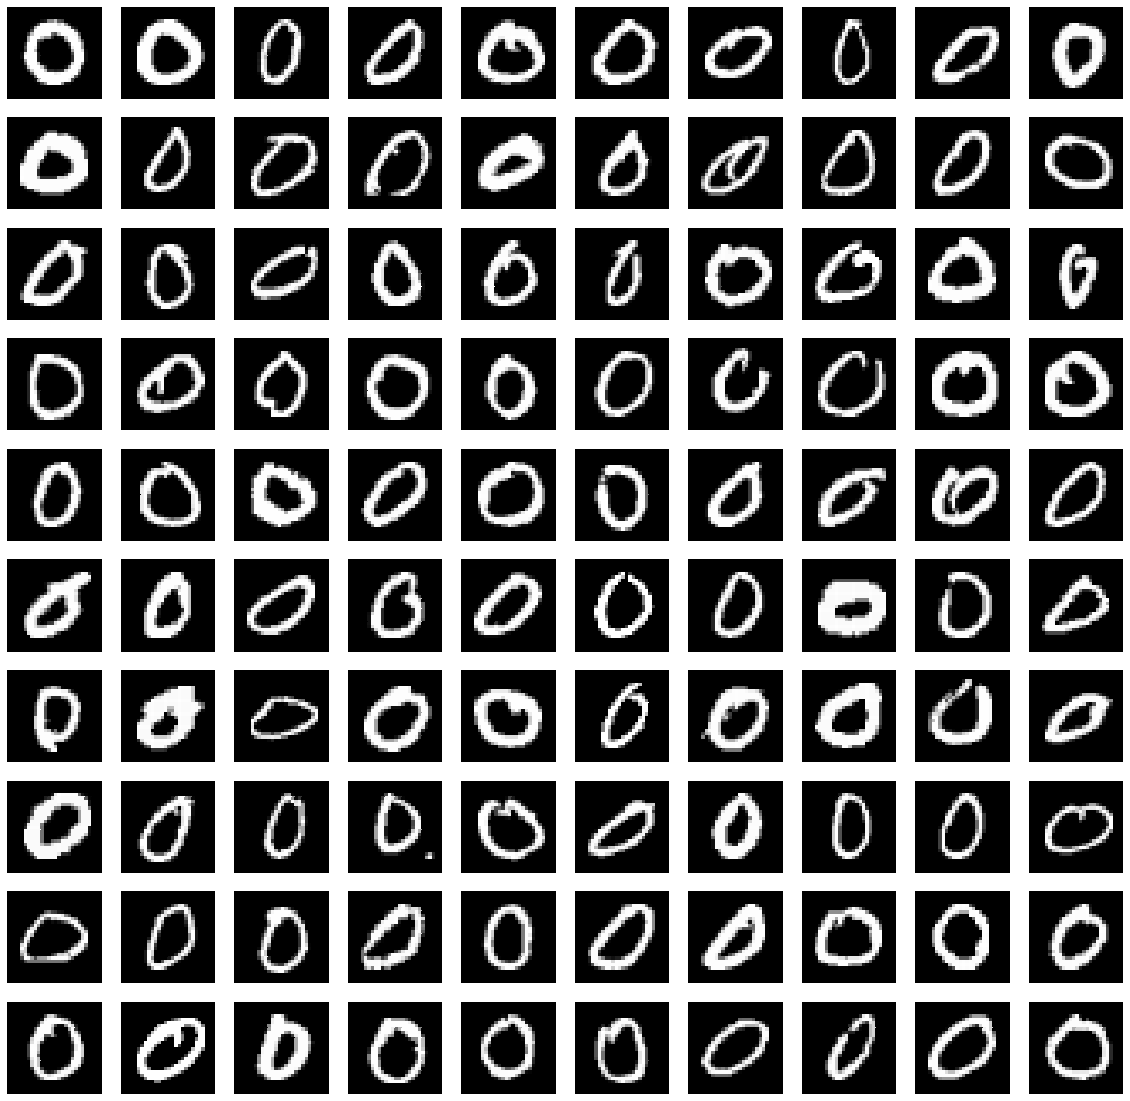

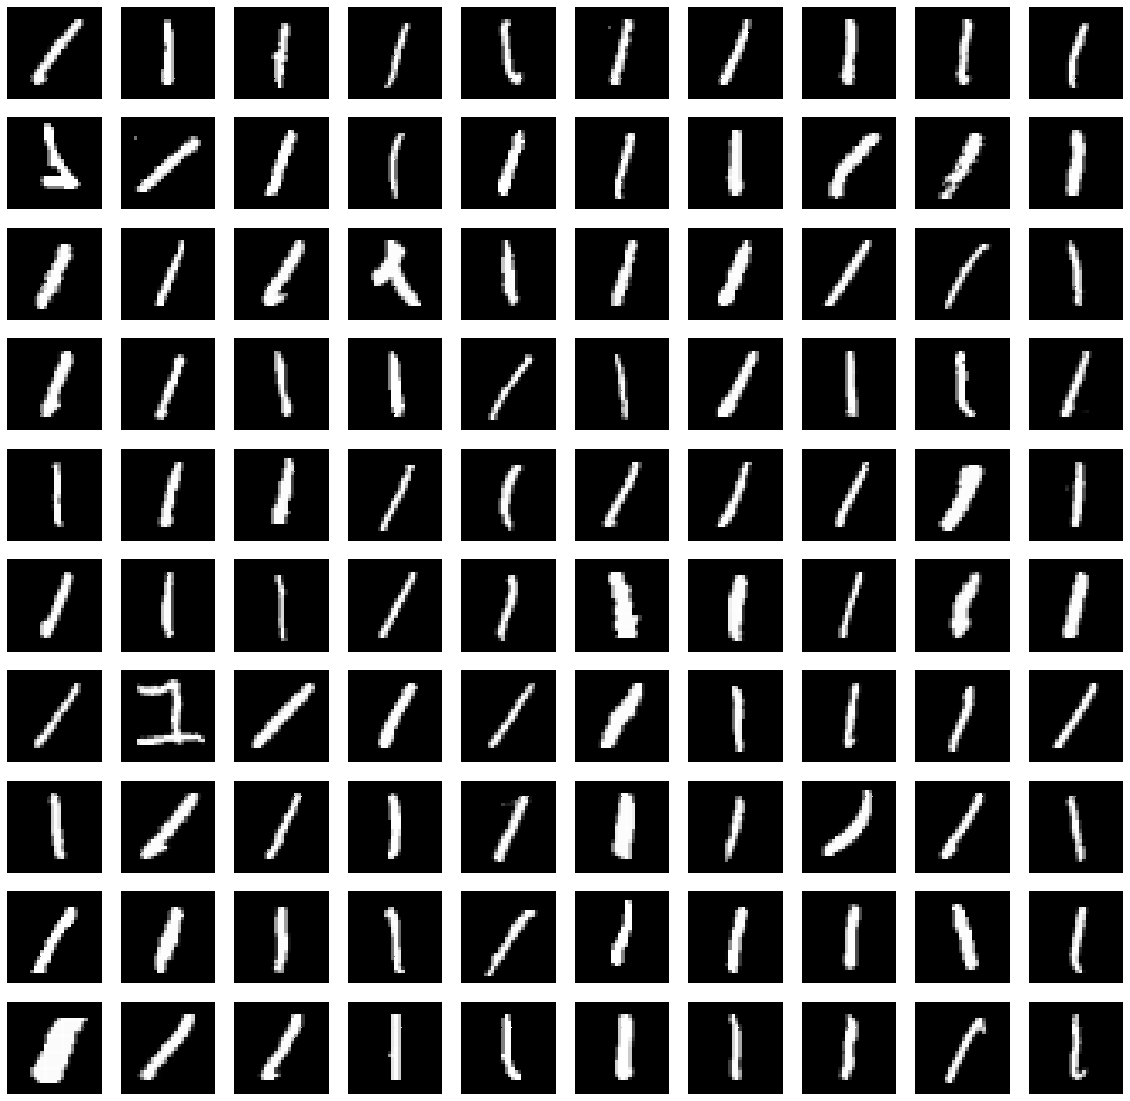

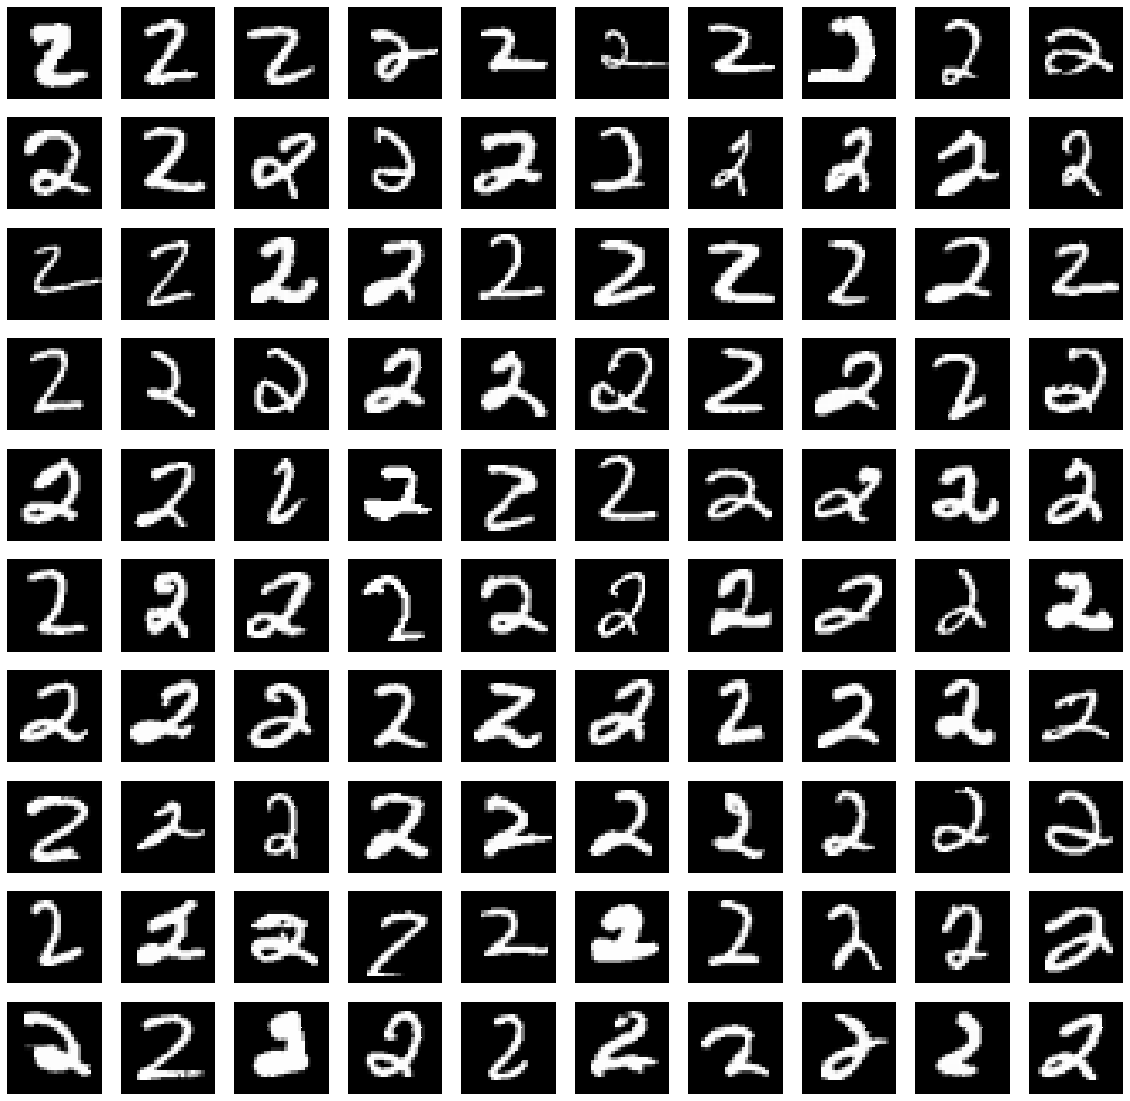

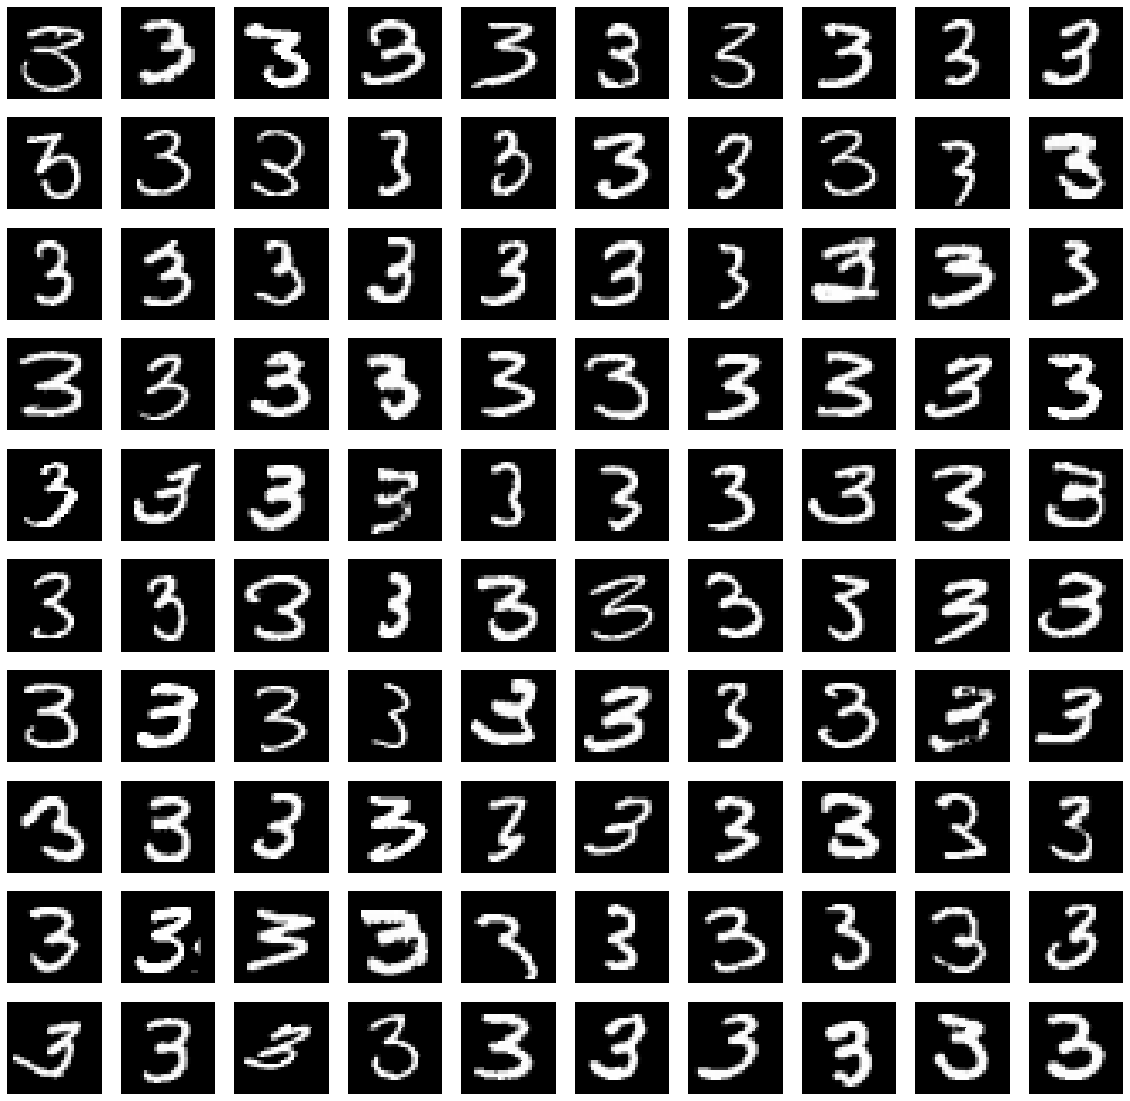

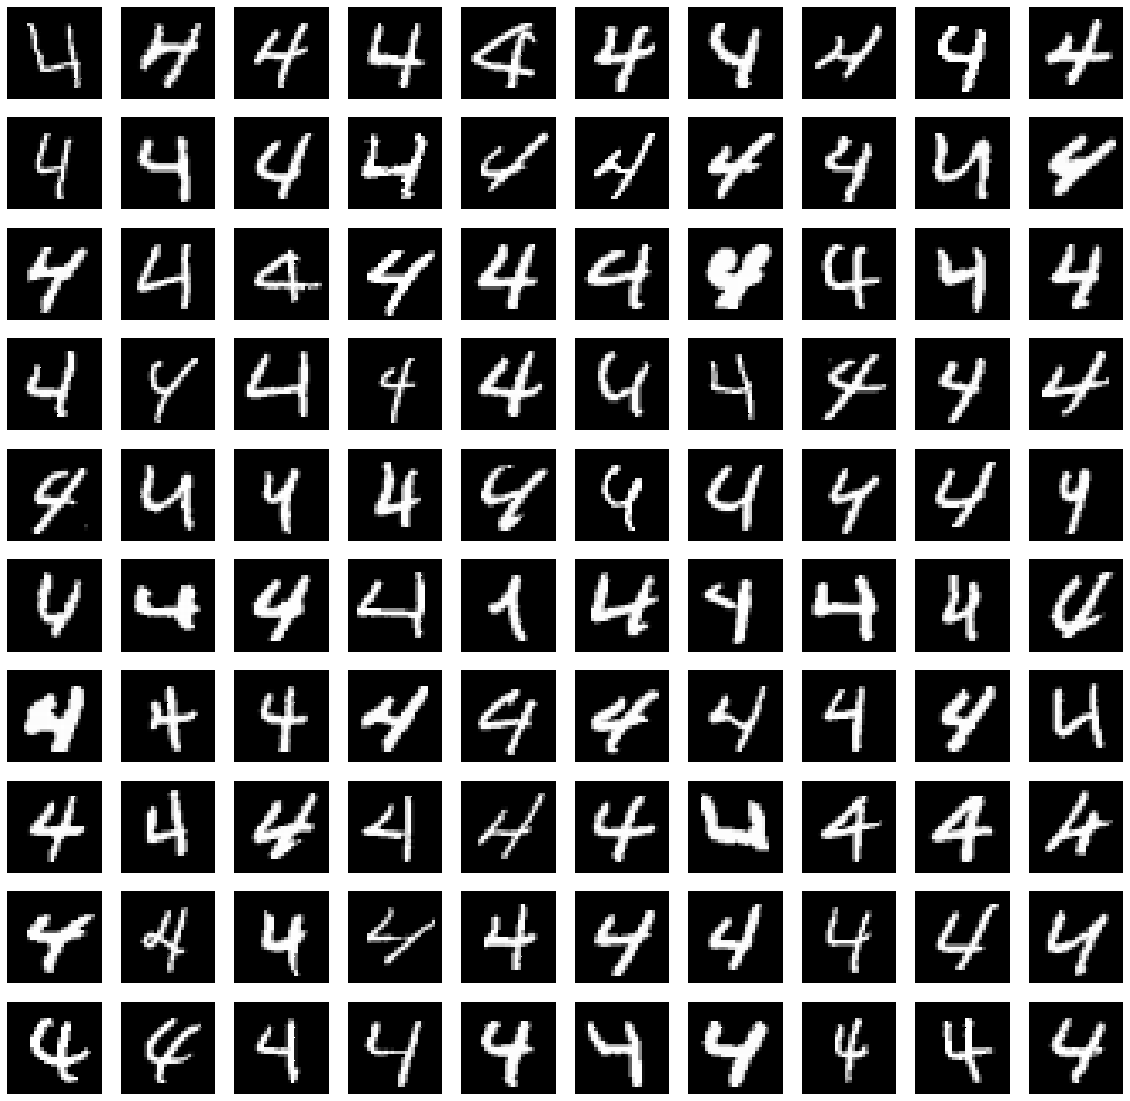

In [ ]:
for i in range(5):
  graph_digit(mnist, limit_size = 100, label=i)

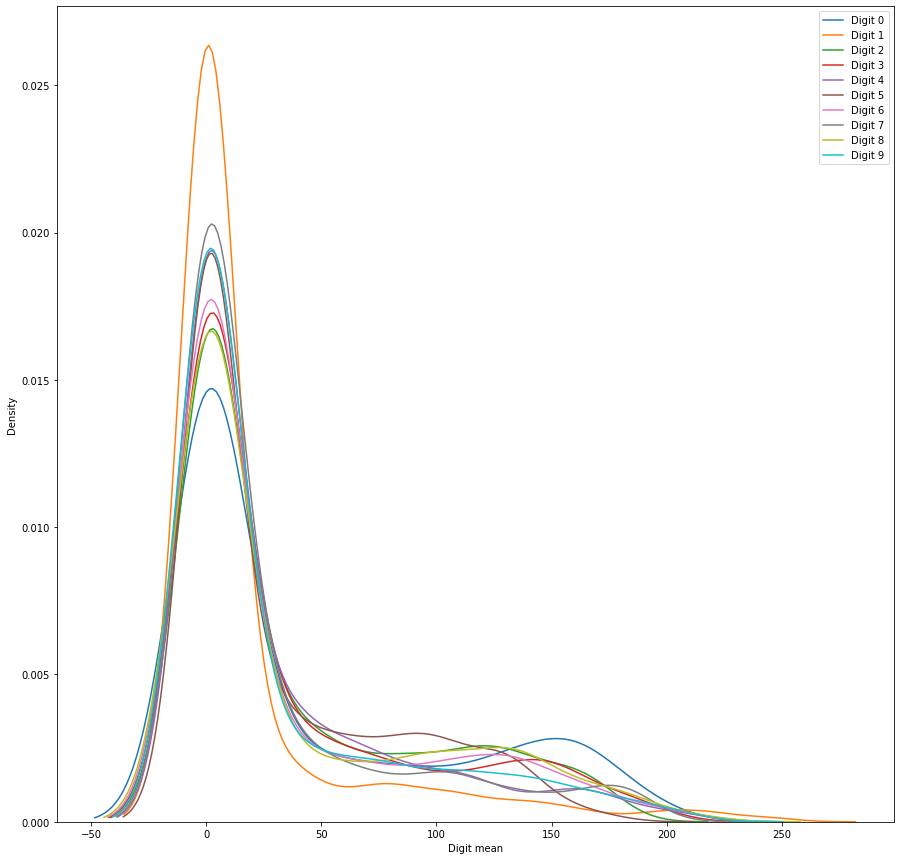

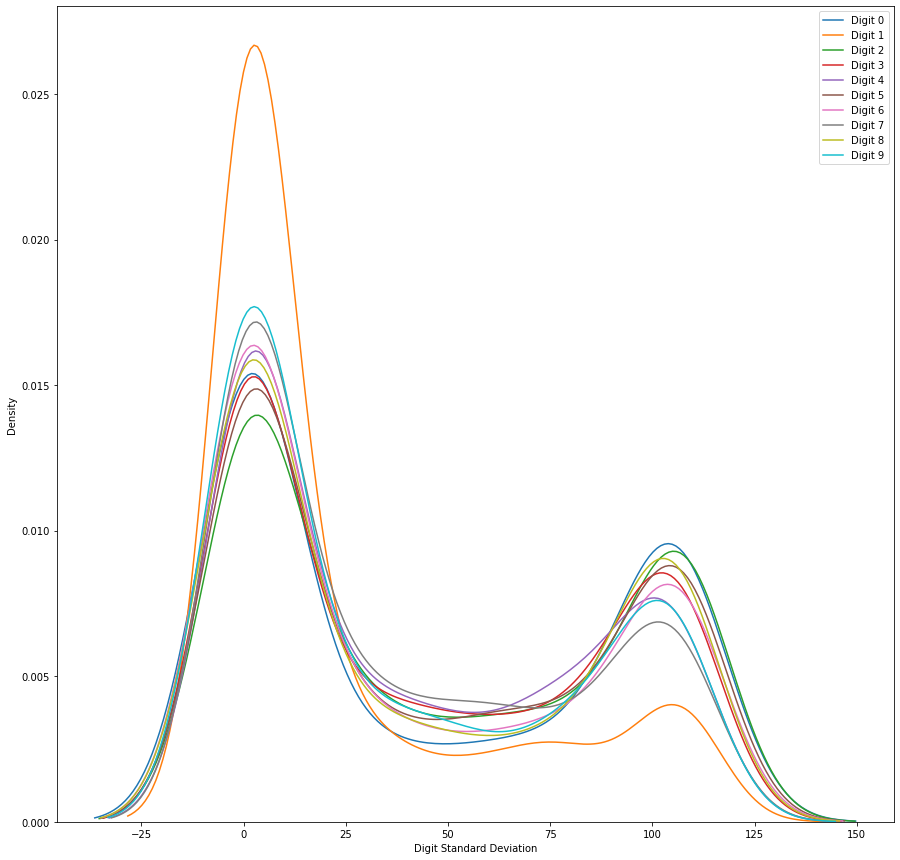

In [ ]:
graph_mean(mnist)
graph_std(mnist)

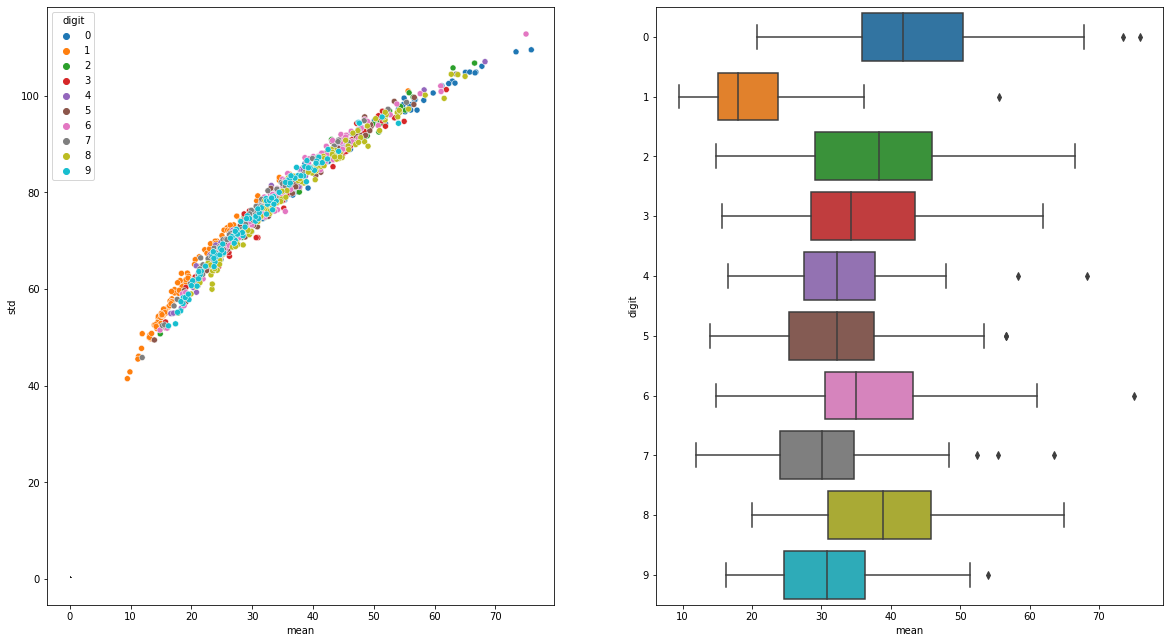

In [ ]:
graph_moment(mnist, sample_size=100)

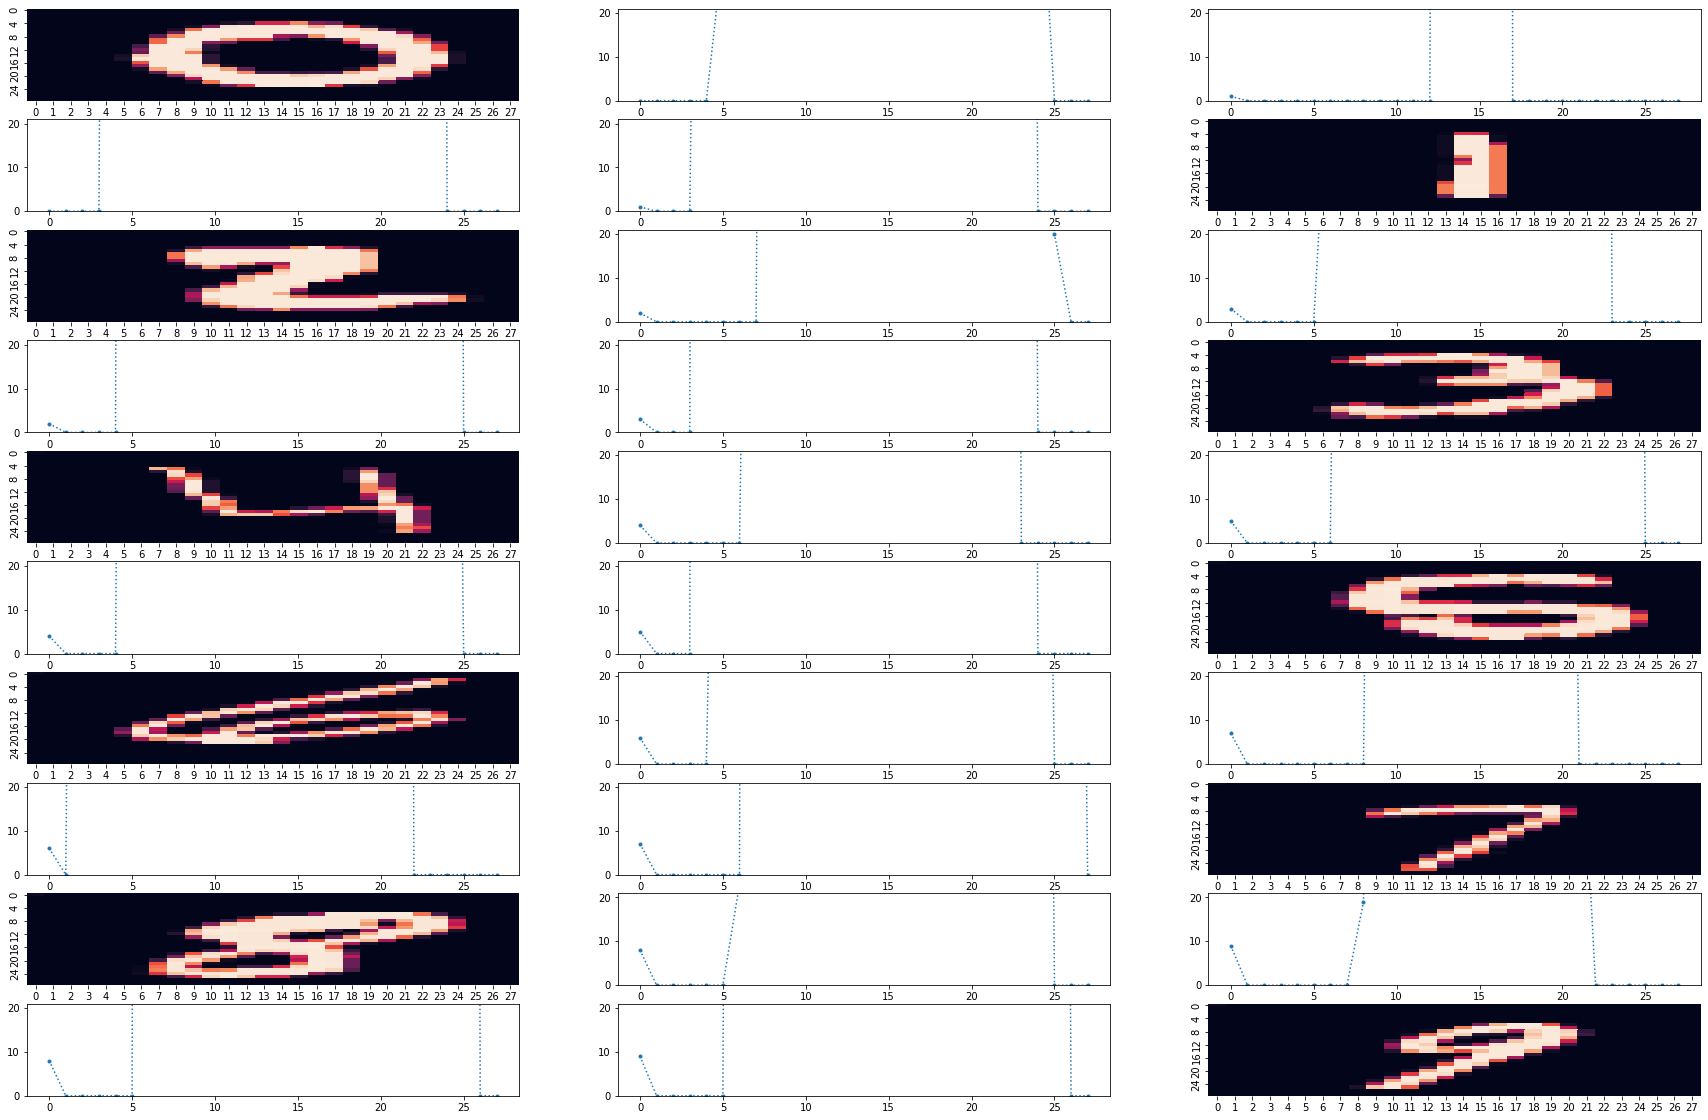

In [ ]:
graph_features(mnist)

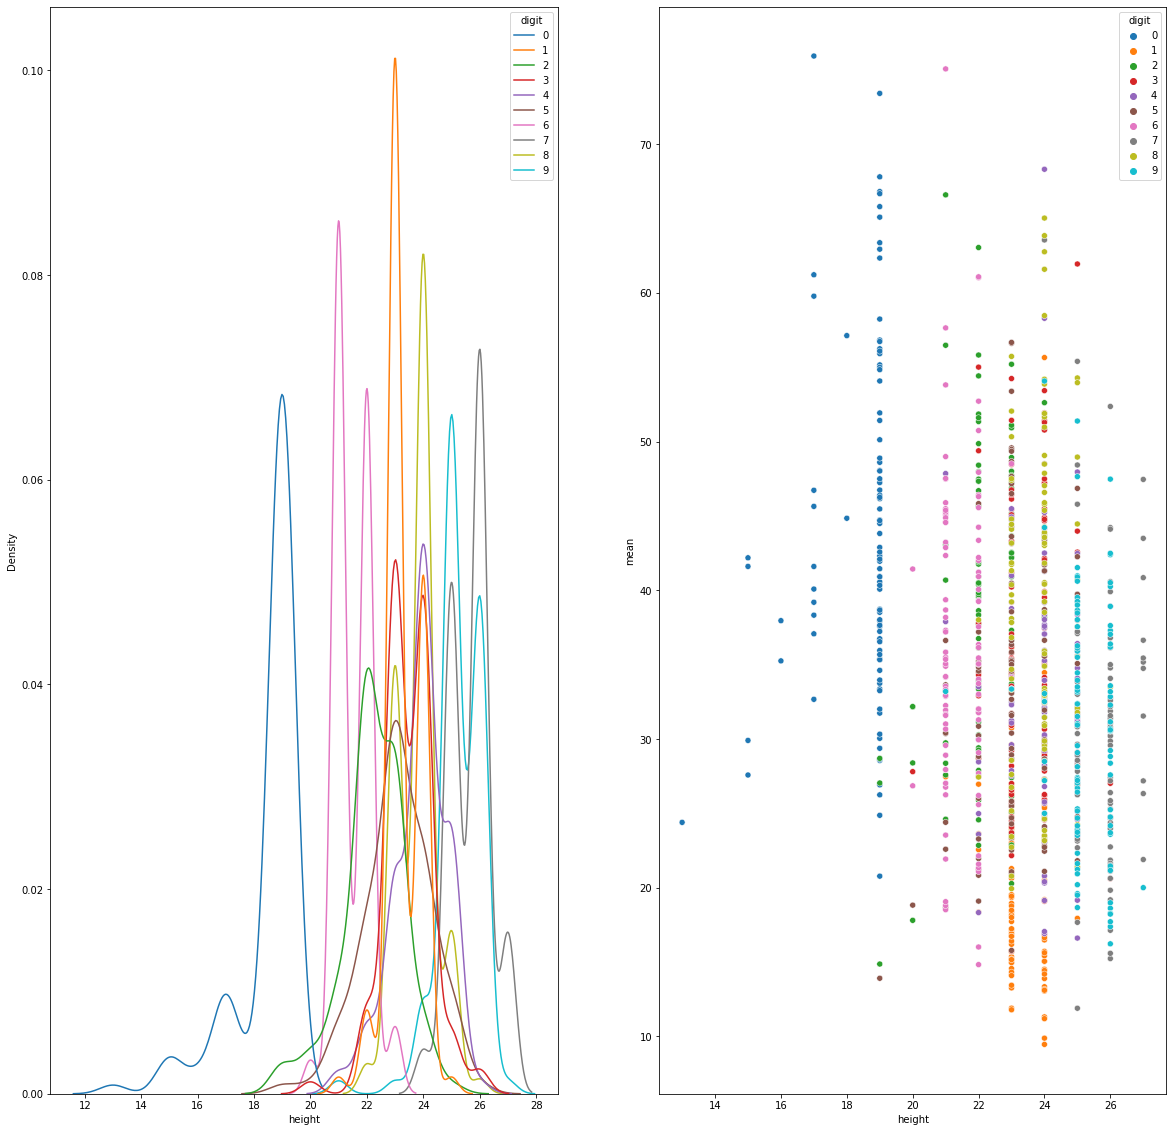

In [ ]:
digit_range = get_digit_range(mnist)
graph_range(digit_range, to_graph="height")

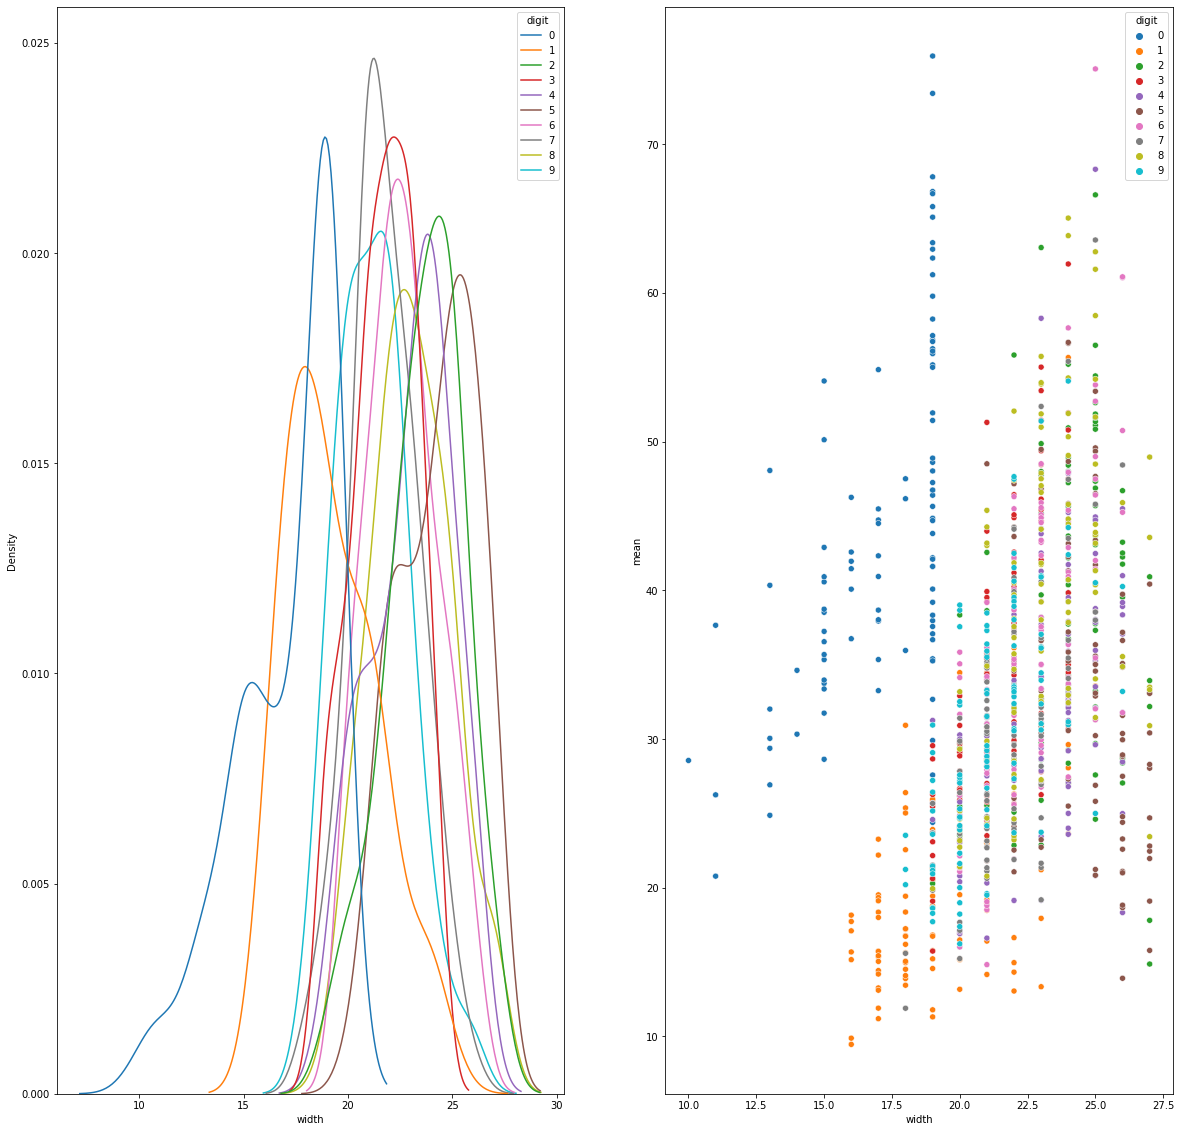

In [ ]:
graph_range(digit_range, to_graph="width")

### The final data frame

In [ ]:
digit_range

width  height       mean         std digit
1        19      19  56.826752   99.169230     0
4        19      19  65.086624  104.821216     0
5        13      19  29.377070   72.942985     0
17       17      19  42.315924   86.855451     0
23       19      19  58.235669   99.027010     0
...     ...     ...        ...         ...   ...
989      21      25  19.504459   58.913226     9
997      21      26  36.388535   83.398298     9
1006     19      25  27.216561   71.925833     9
1028     19      26  17.717197   55.158621     9
1031     25      26  40.508280   86.008440     9

[1000 rows x 5 columns]

### Min Max Normalization

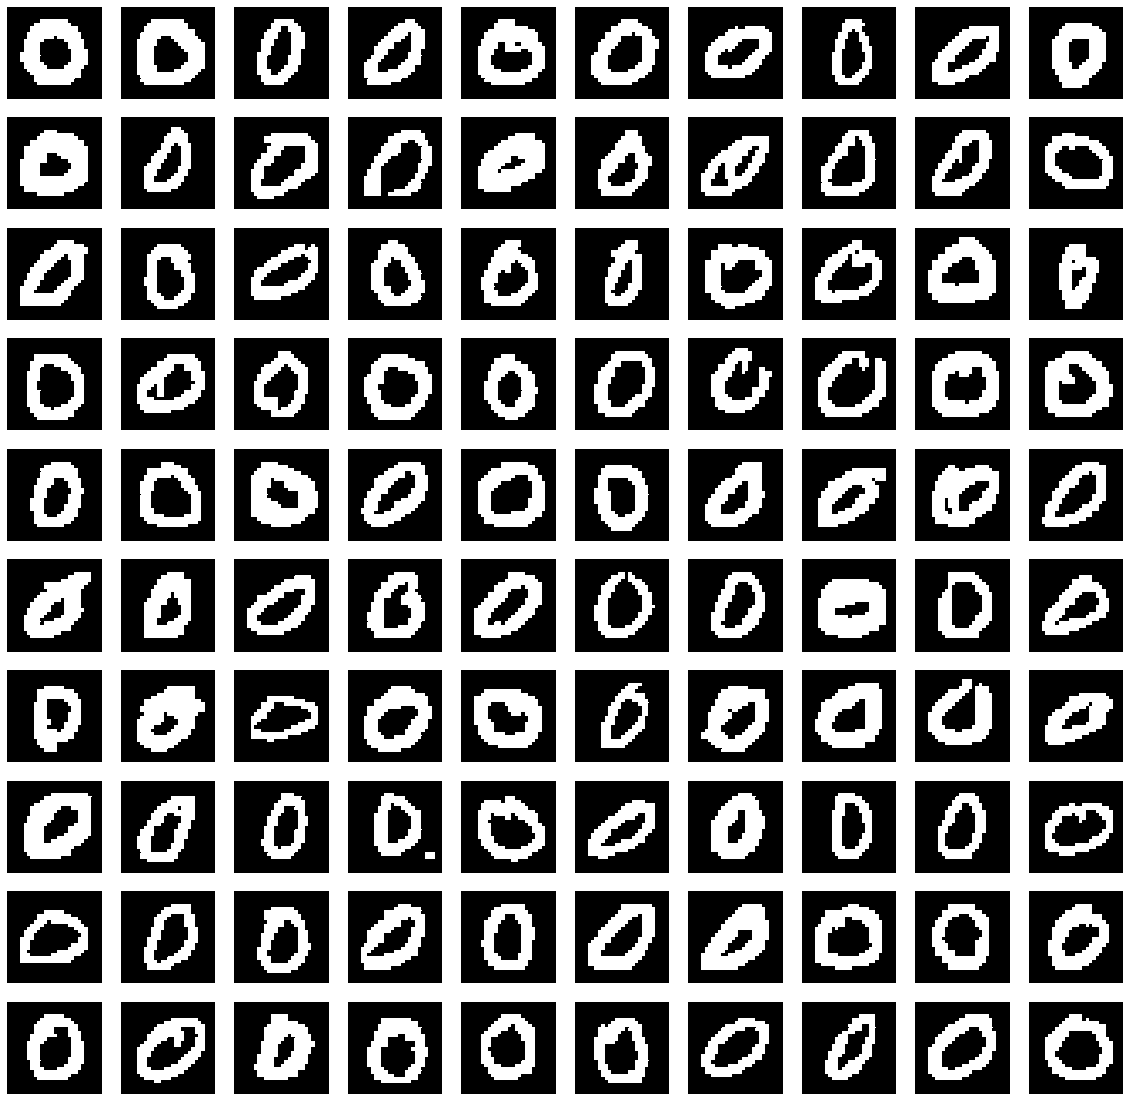

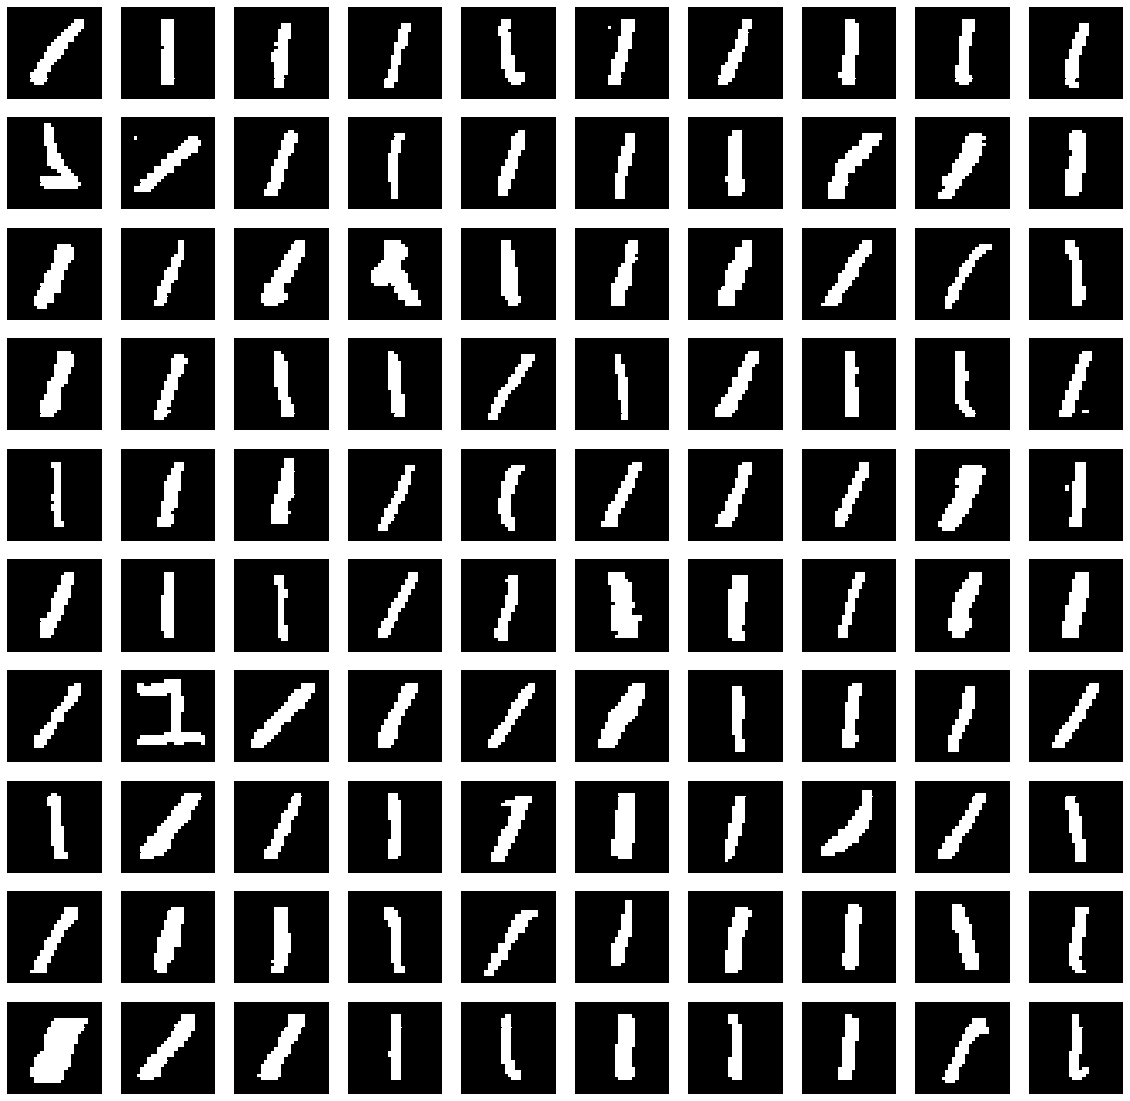

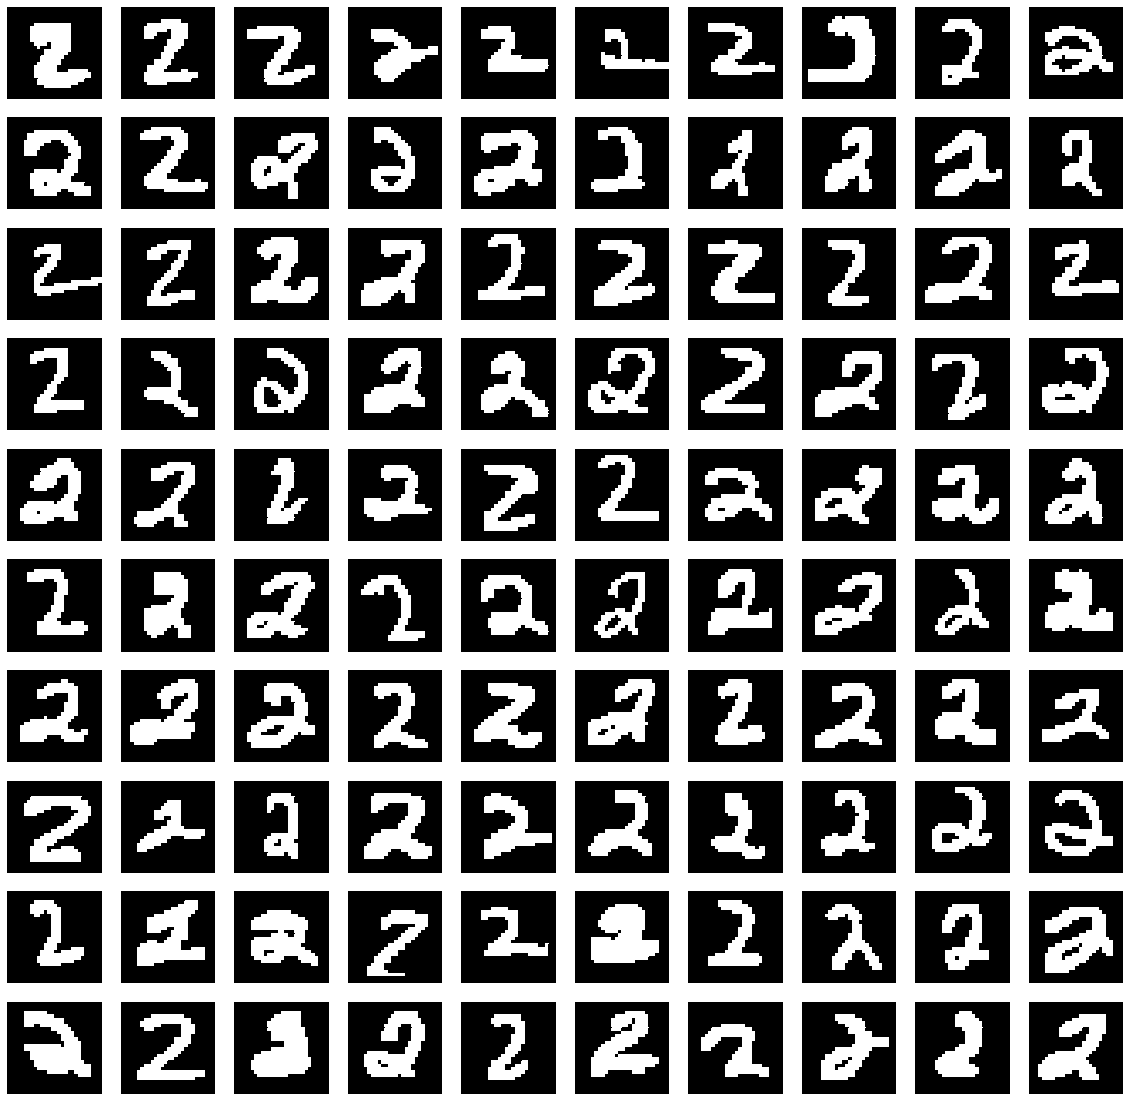

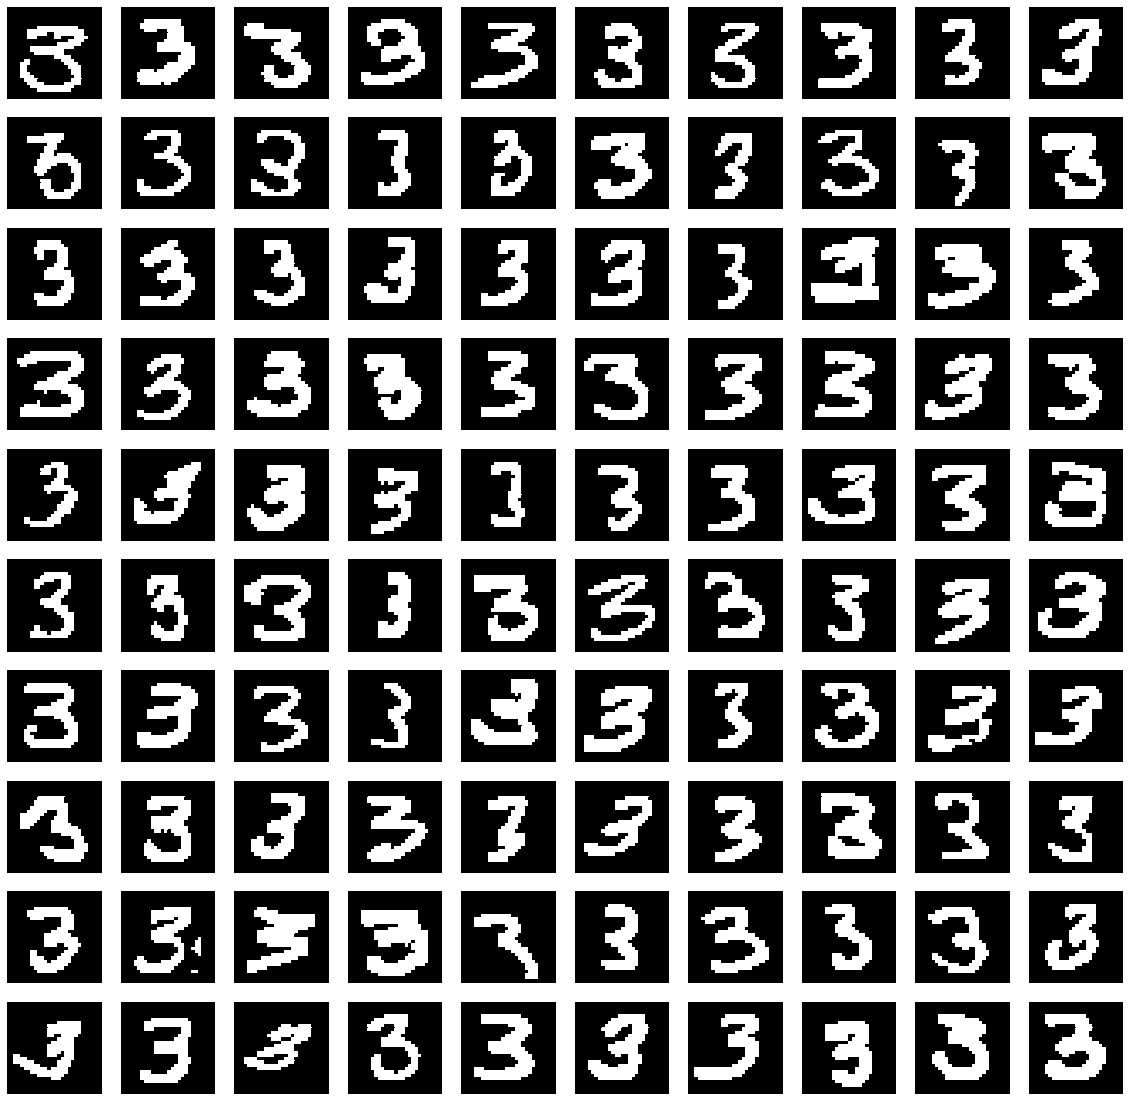

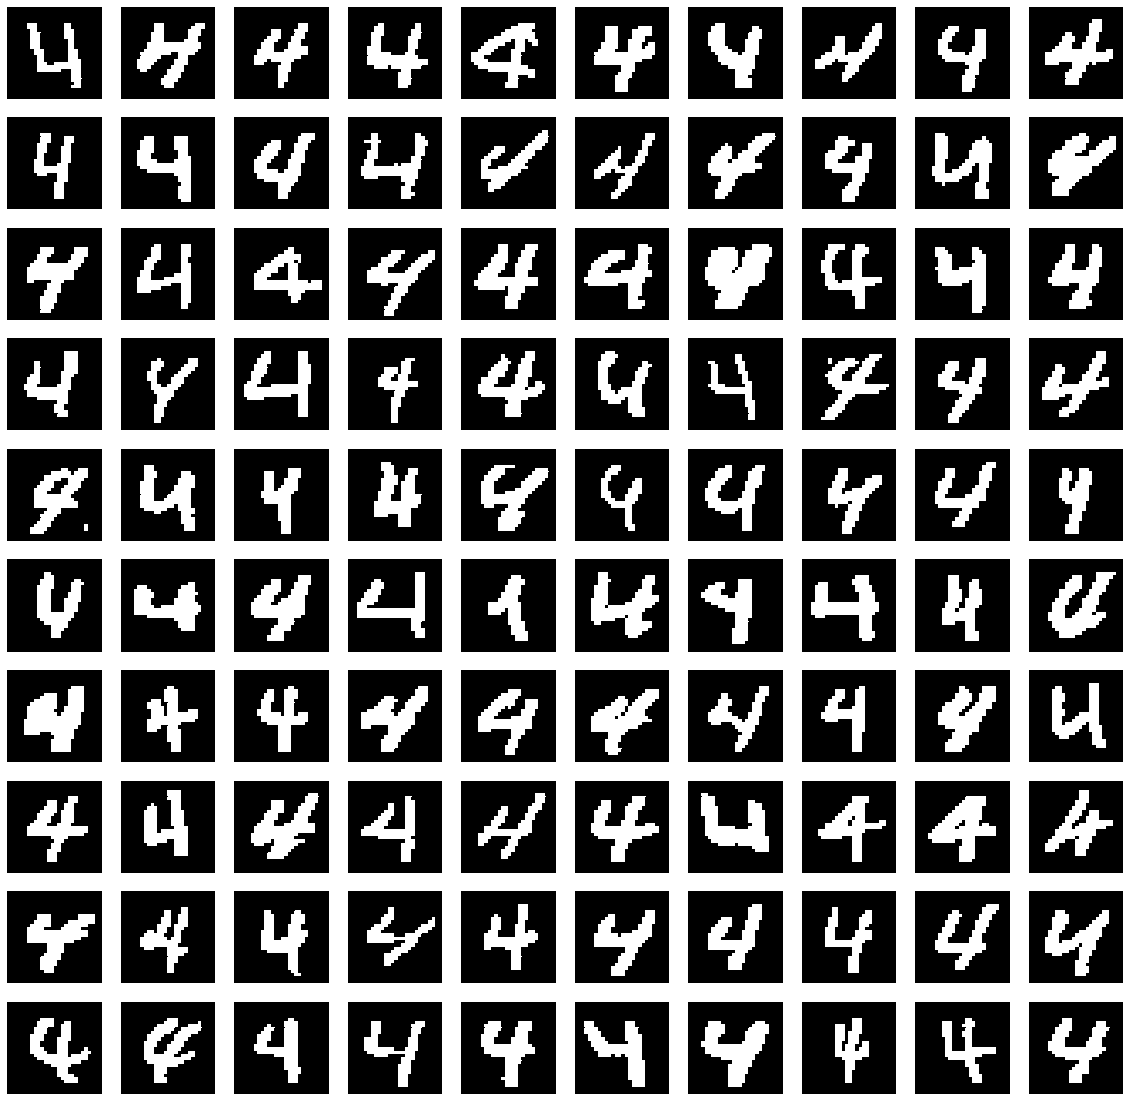

In [ ]:
df = normalize_data(mnist, norm_type='minMax')
for i in range(5):
  graph_digit(df, limit_size = 100, label=i)

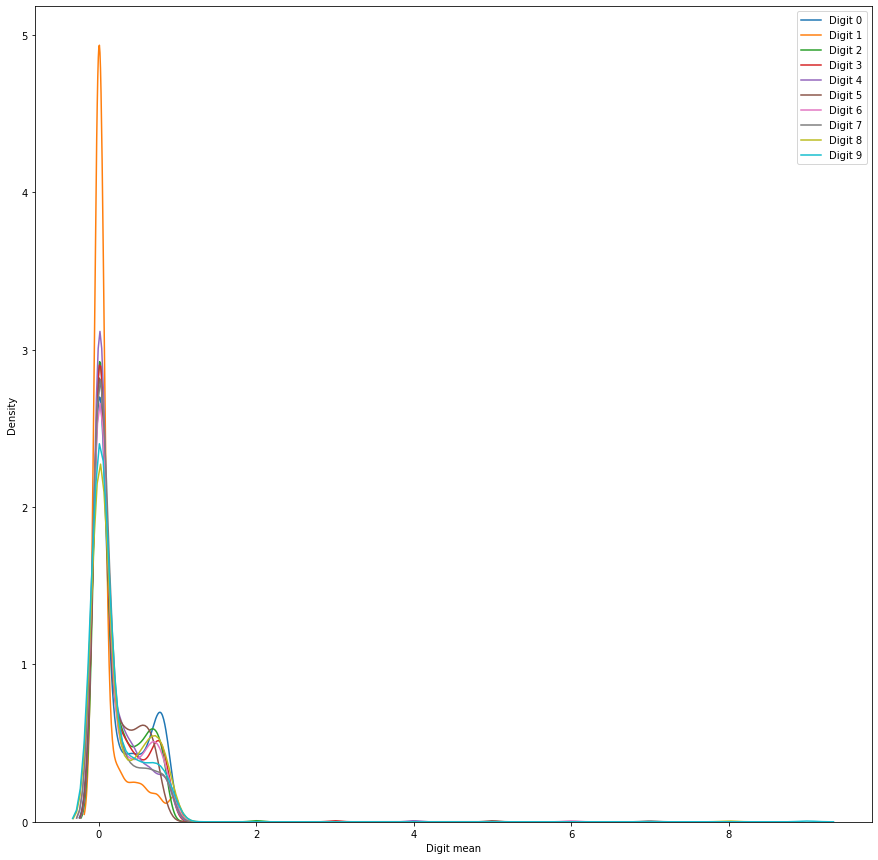

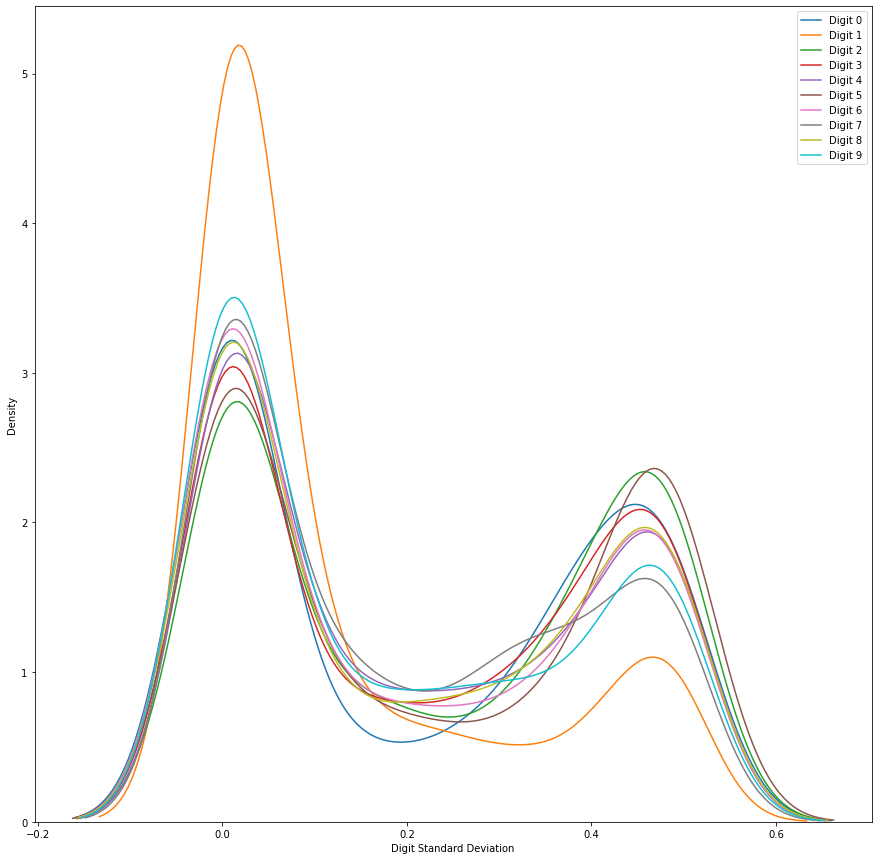

In [ ]:
graph_mean(df)
graph_std(df)

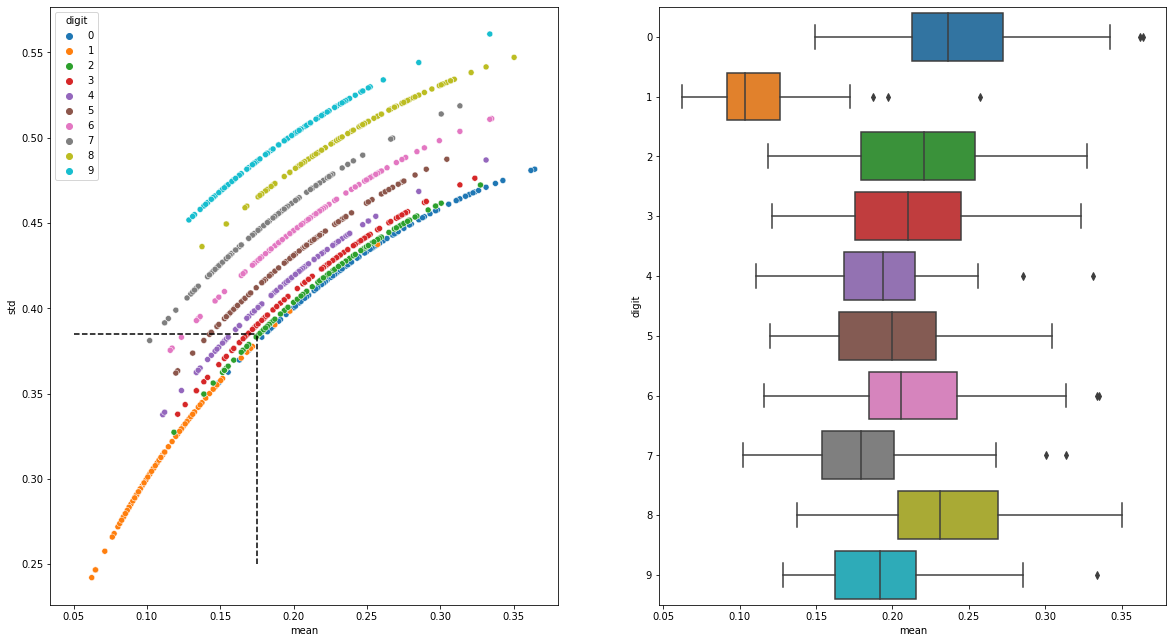

In [ ]:
graph_moment(df, sample_size=100)

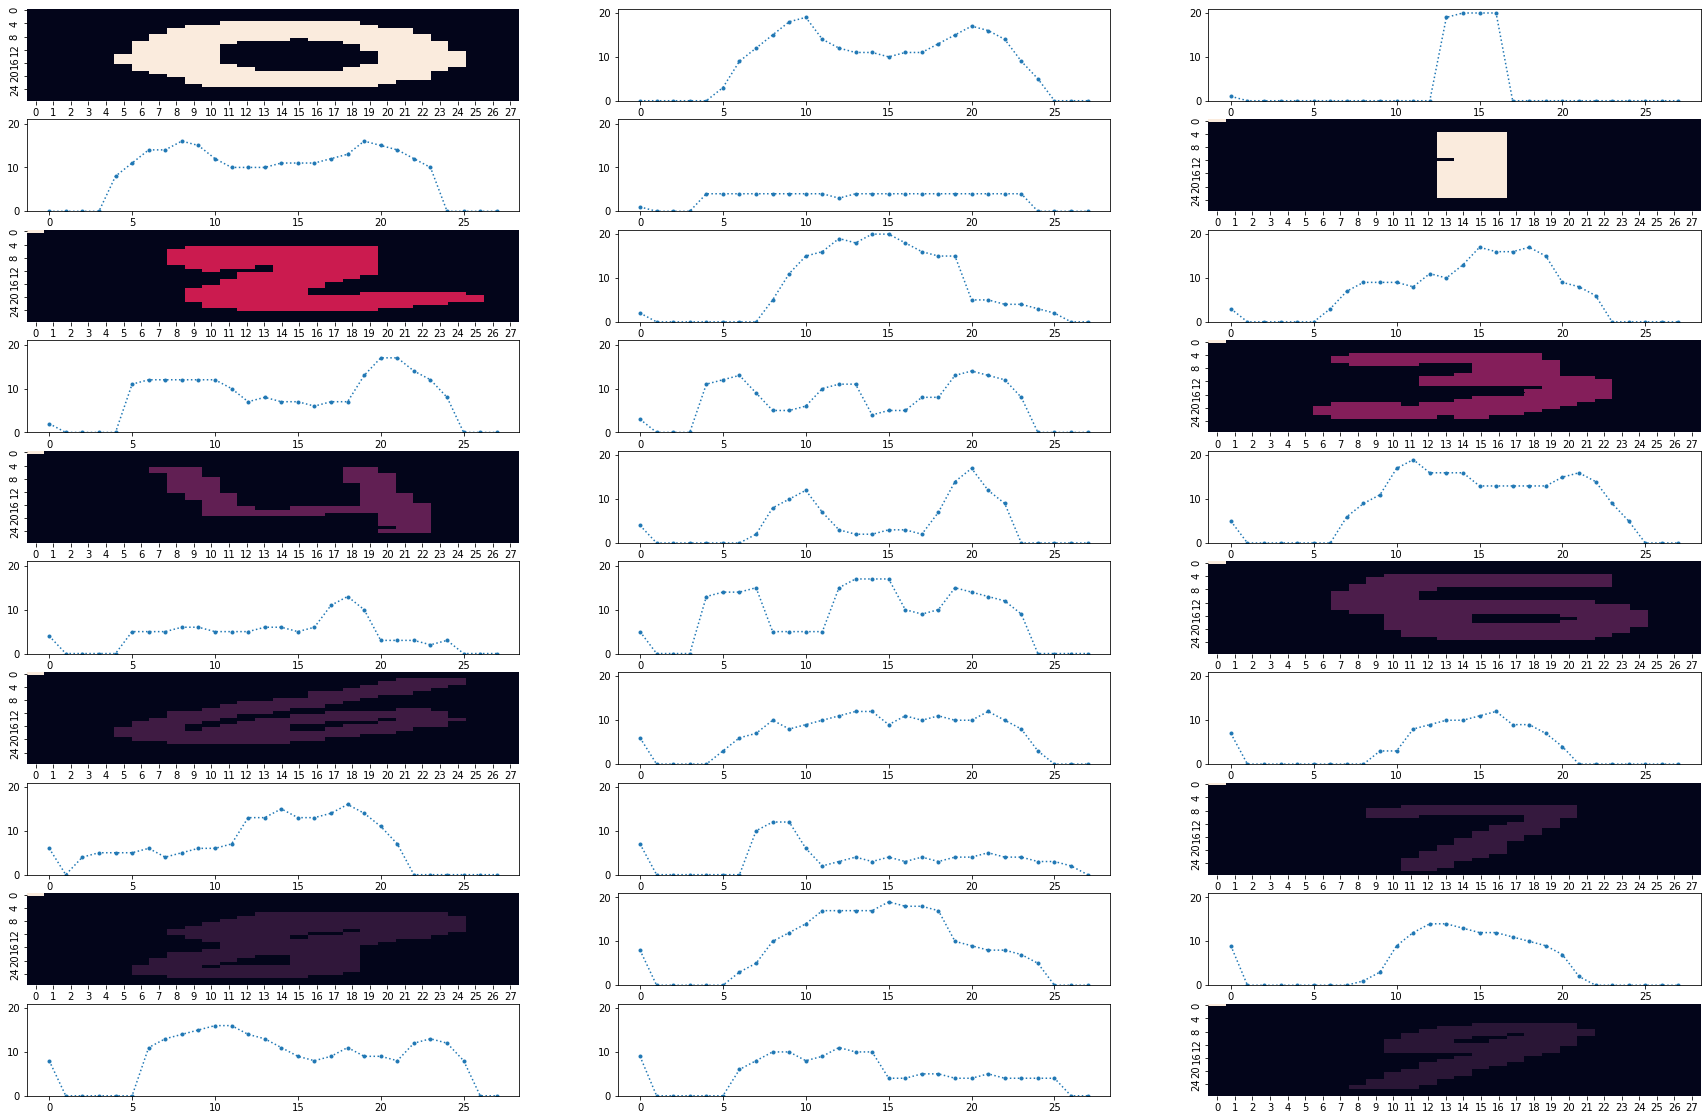

In [ ]:
graph_features(df)

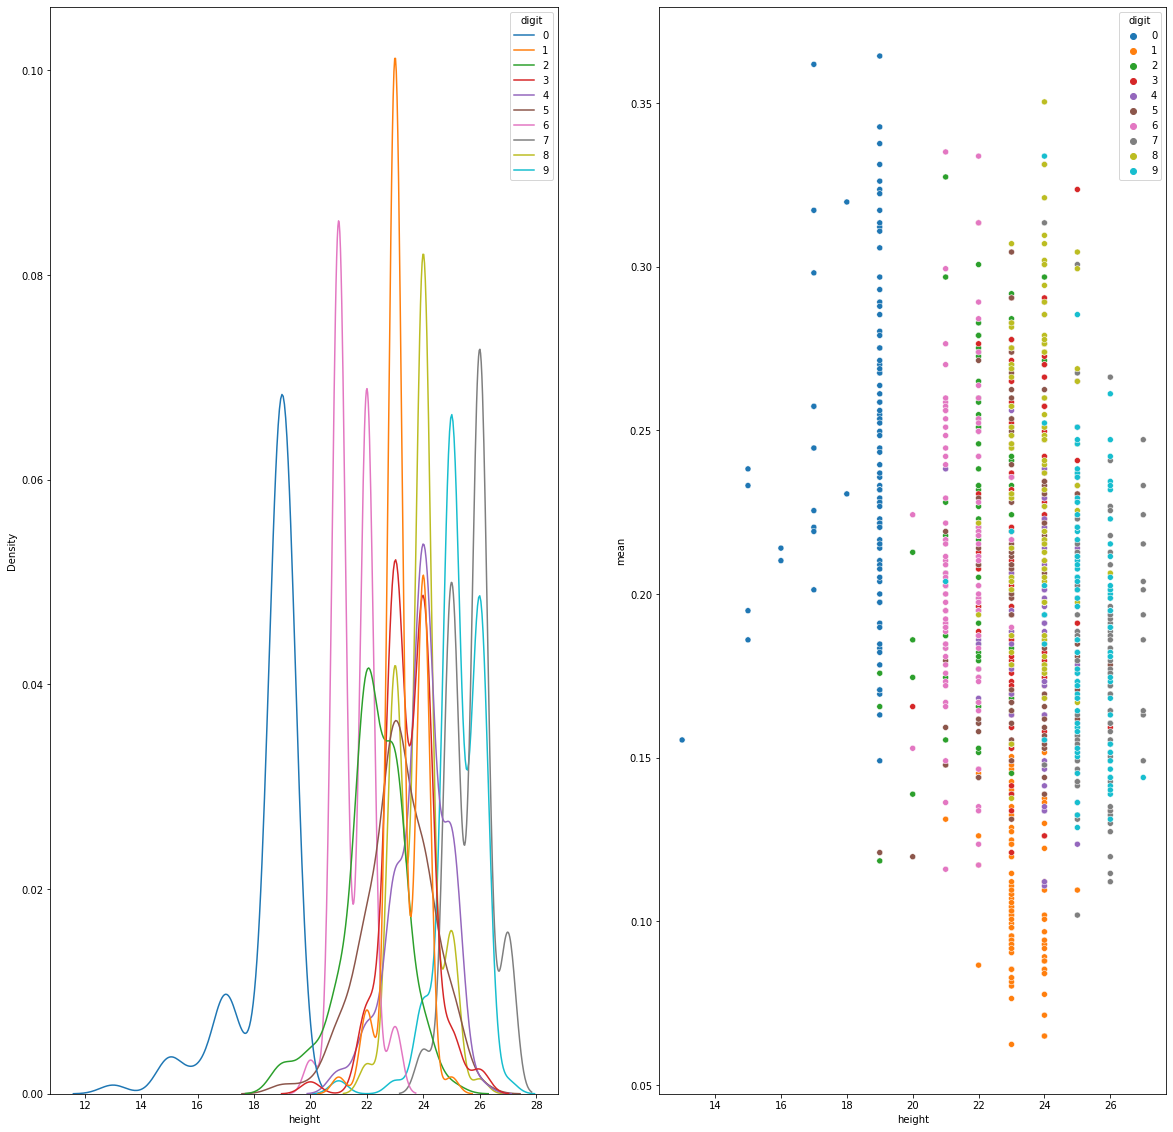

In [ ]:
digit_range = get_digit_range(df)
graph_range(digit_range, to_graph="height")

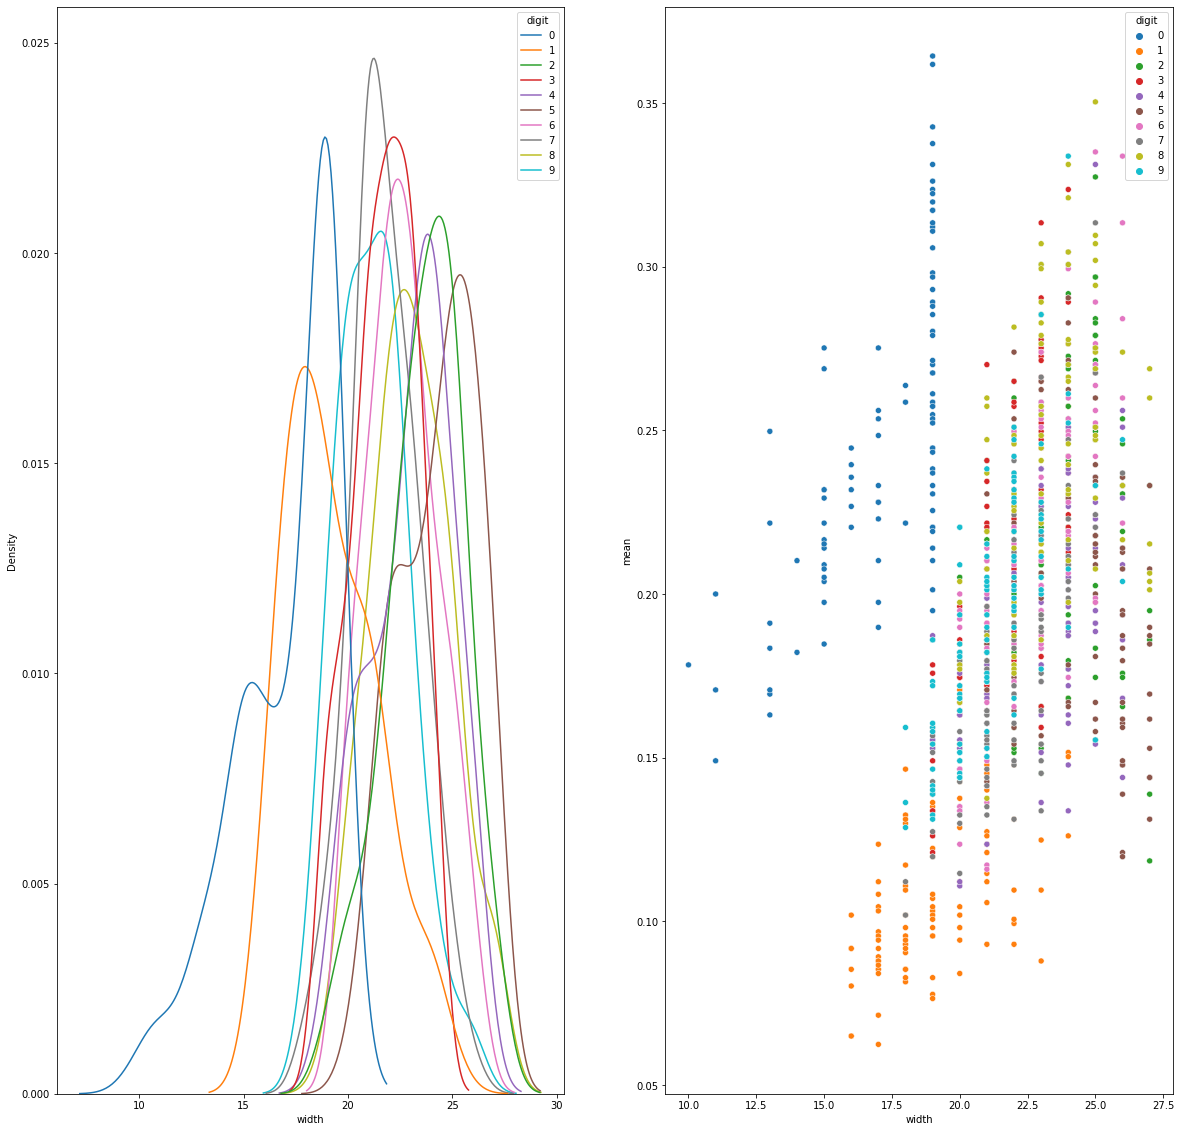

In [ ]:
graph_range(digit_range, to_graph="width")

### The final data frame

In [ ]:
digit_range

width  height      mean       std digit
1        19      19  0.312102  0.463647     0
4        19      19  0.331210  0.470949     0
5        13      19  0.191083  0.393405     0
17       17      19  0.233121  0.423088     0
23       19      19  0.313376  0.464161     0
...     ...     ...       ...       ...   ...
989      21      25  0.152866  0.470638     9
997      21      26  0.211465  0.508721     9
1006     19      25  0.160510  0.476188     9
1028     19      26  0.131210  0.453846     9
1031     25      26  0.233121  0.520423     9

[1000 rows x 5 columns]

## Standard Deviation Normalization

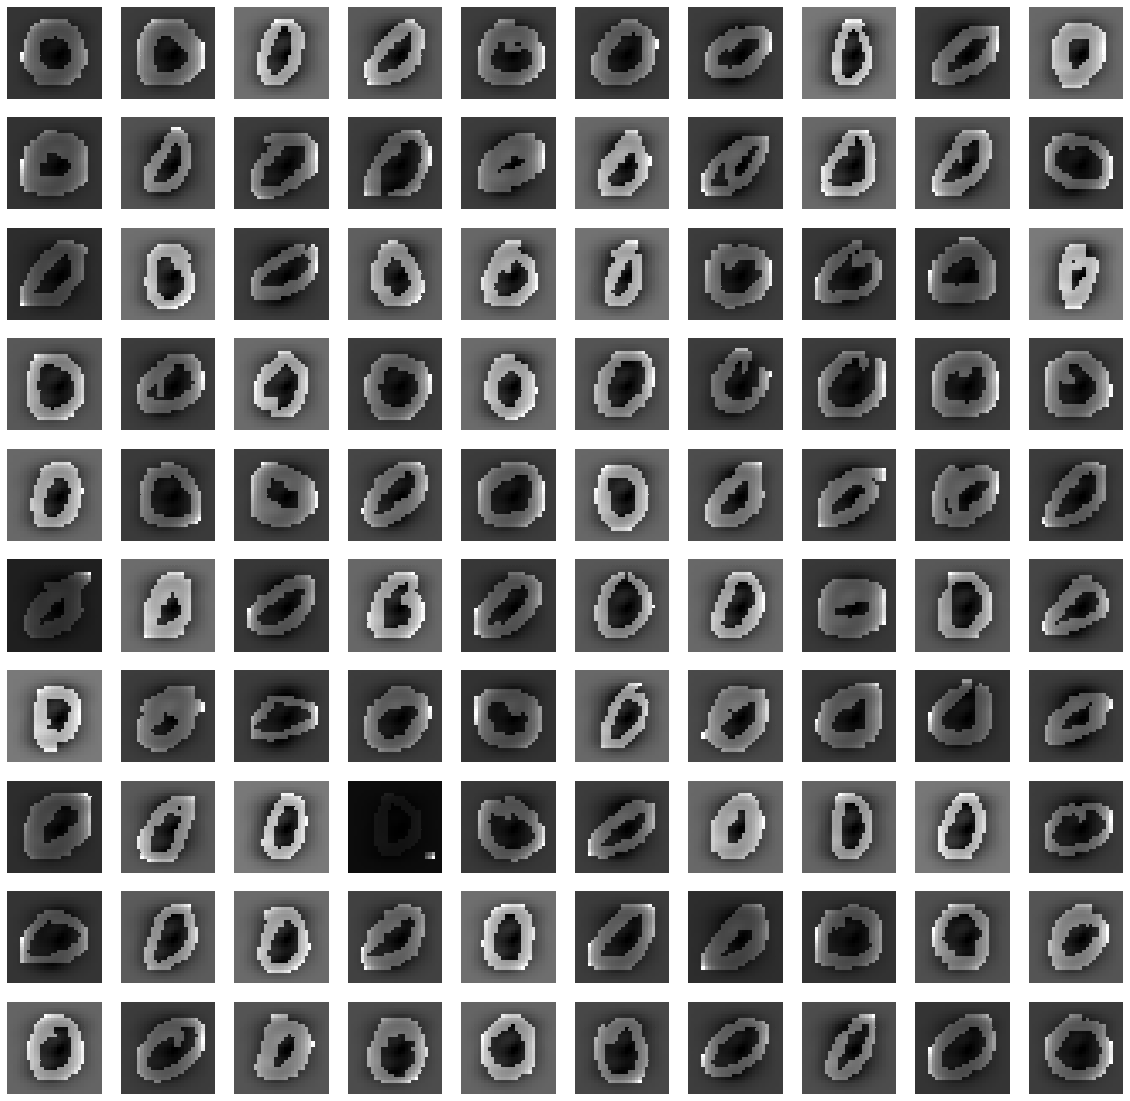

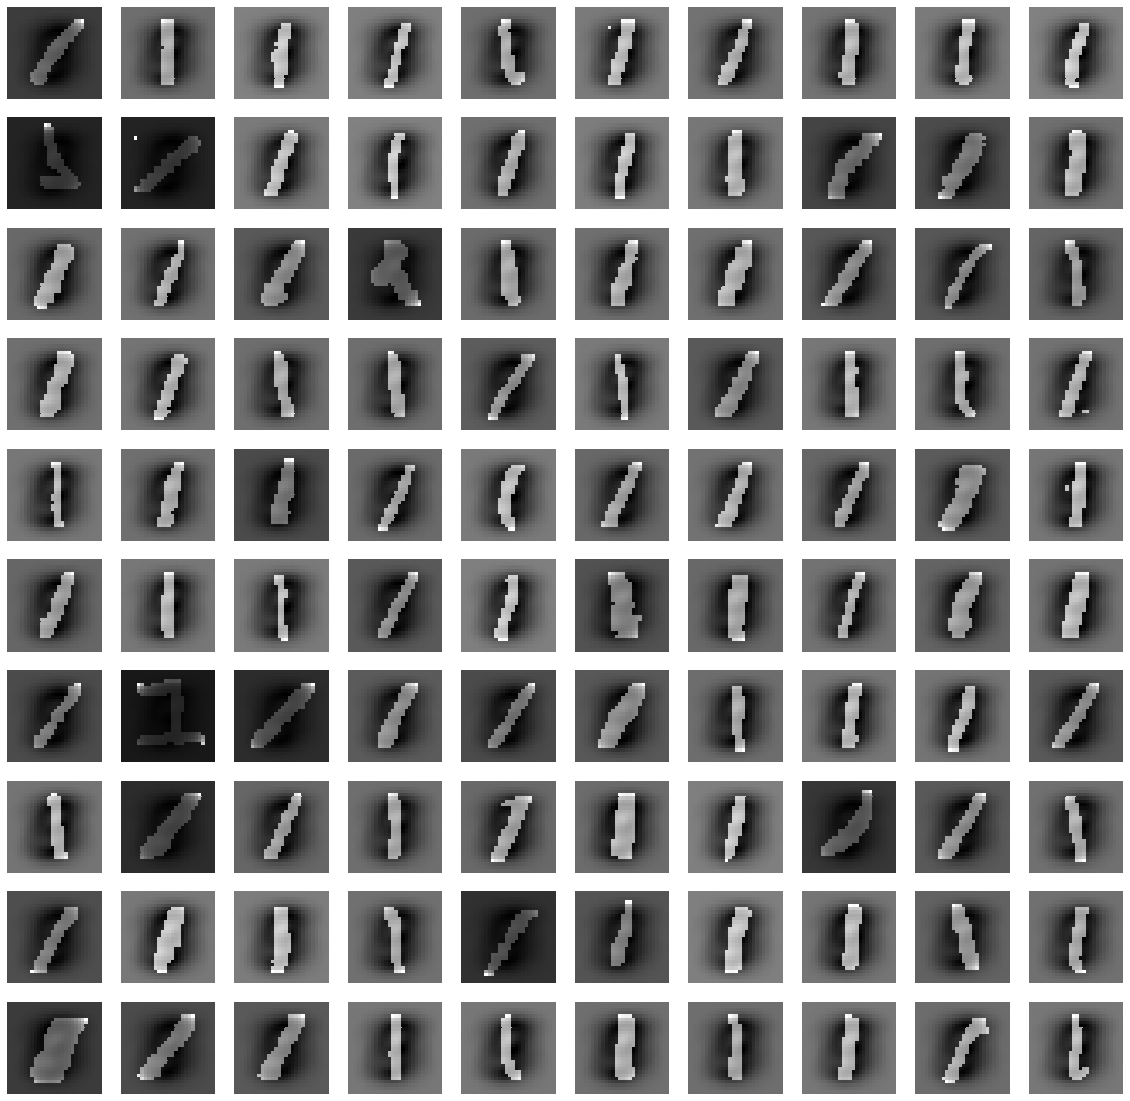

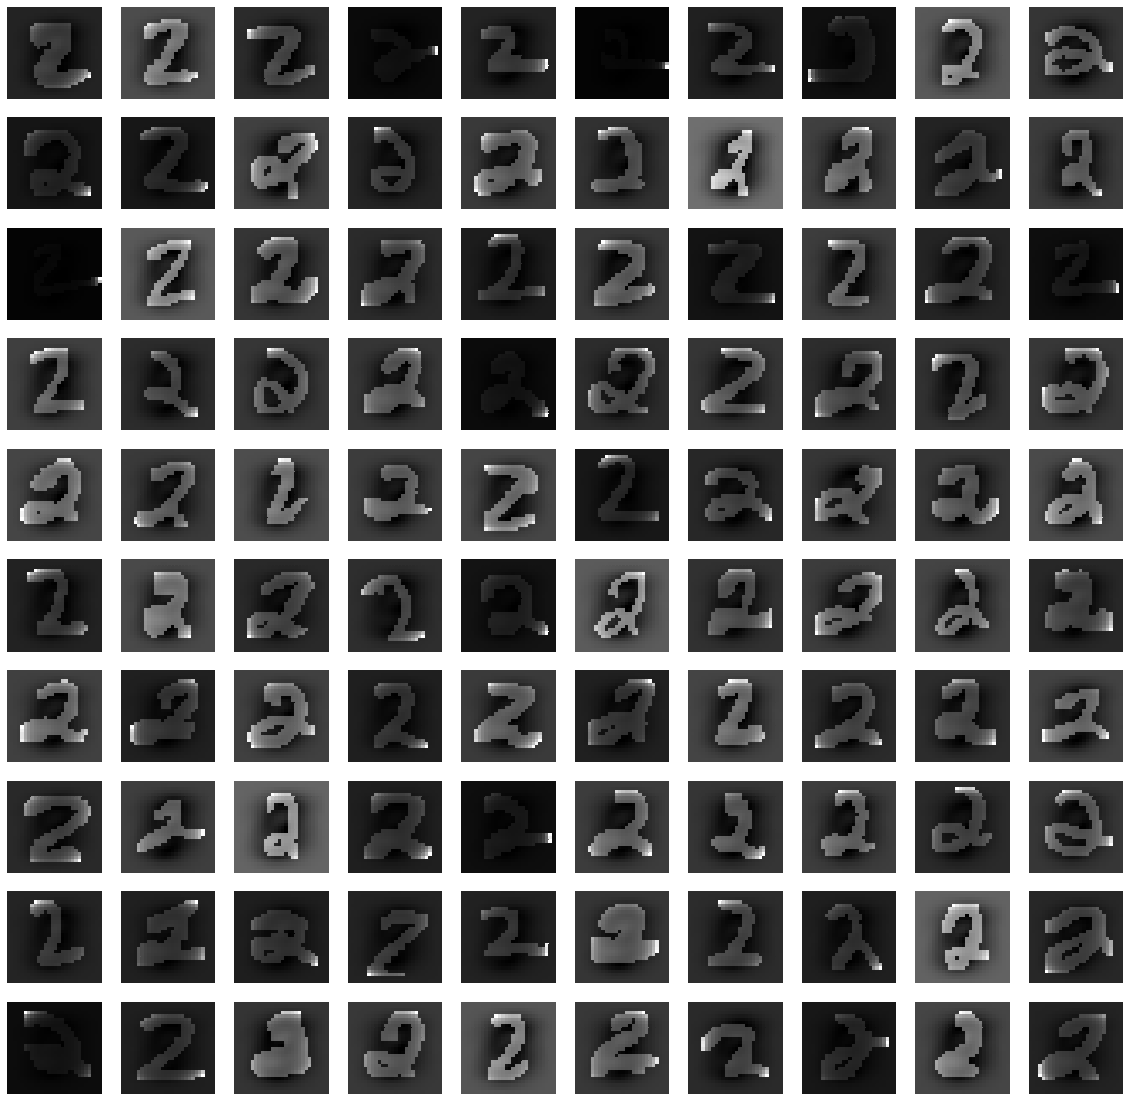

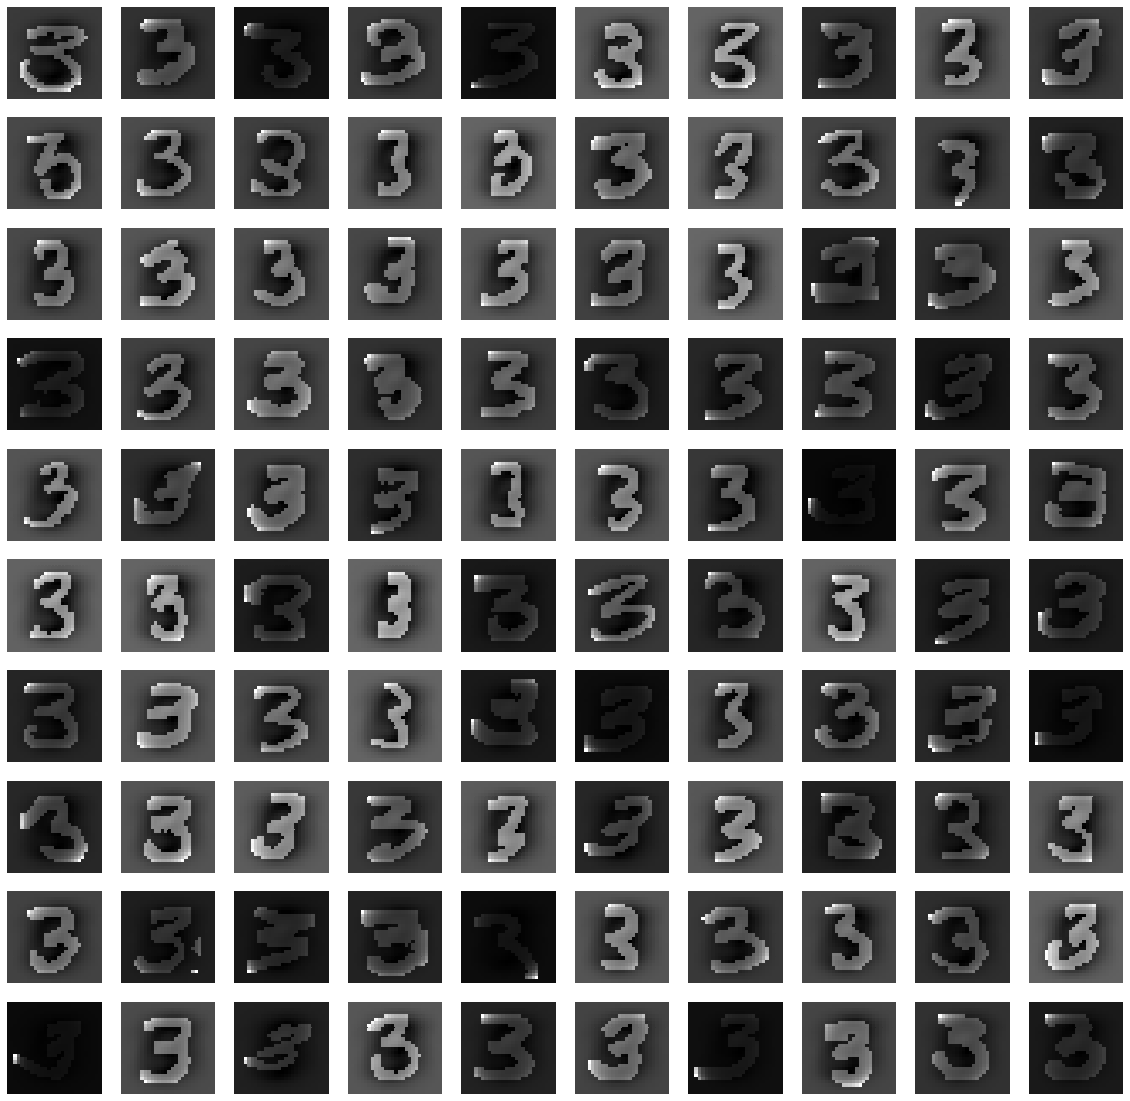

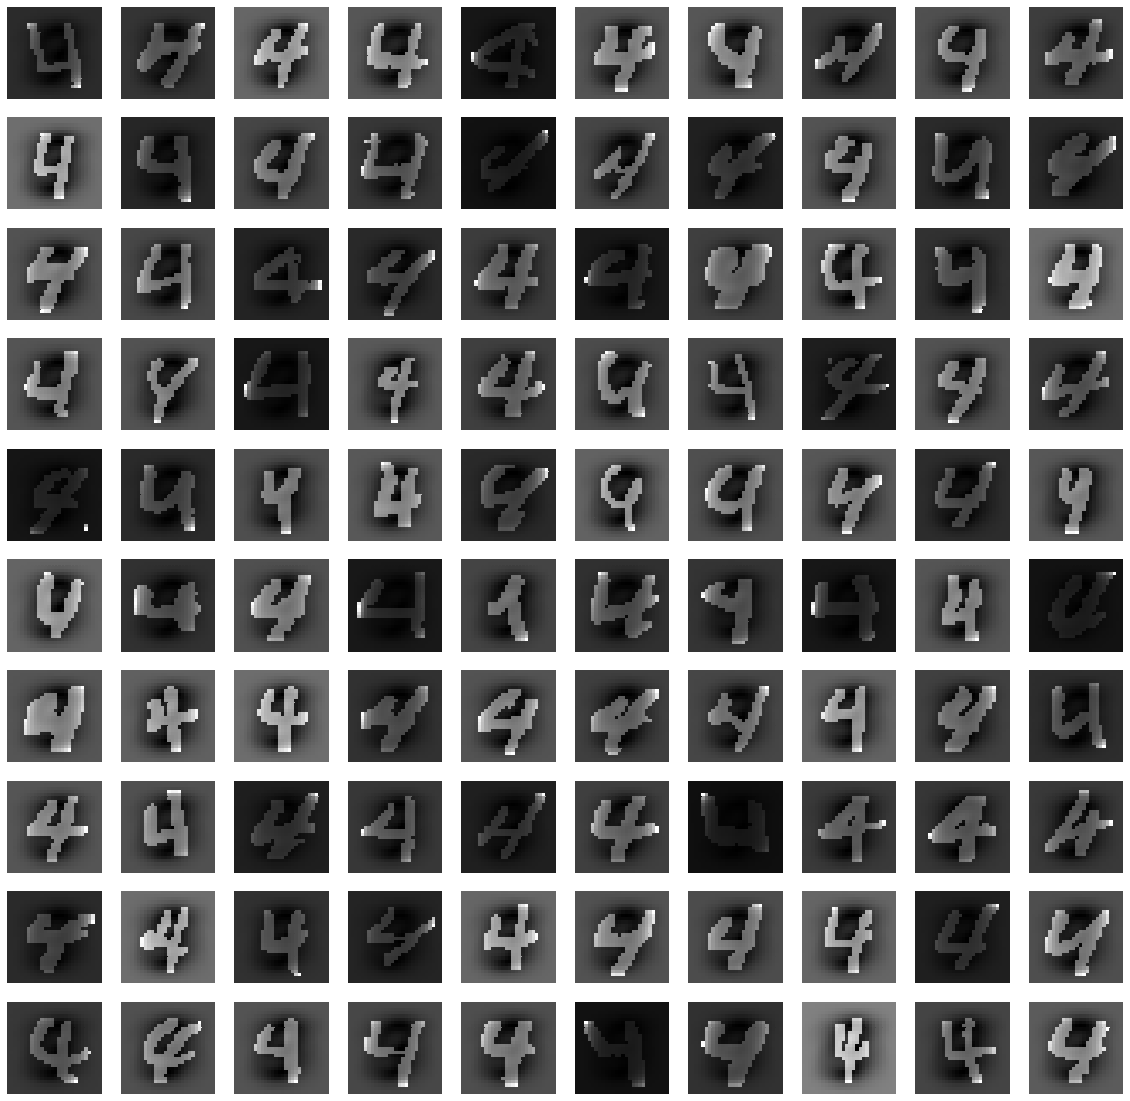

In [ ]:
df = normalize_data(mnist, norm_type='std')
for i in range(5):
  graph_digit(df, limit_size = 100, label=i)

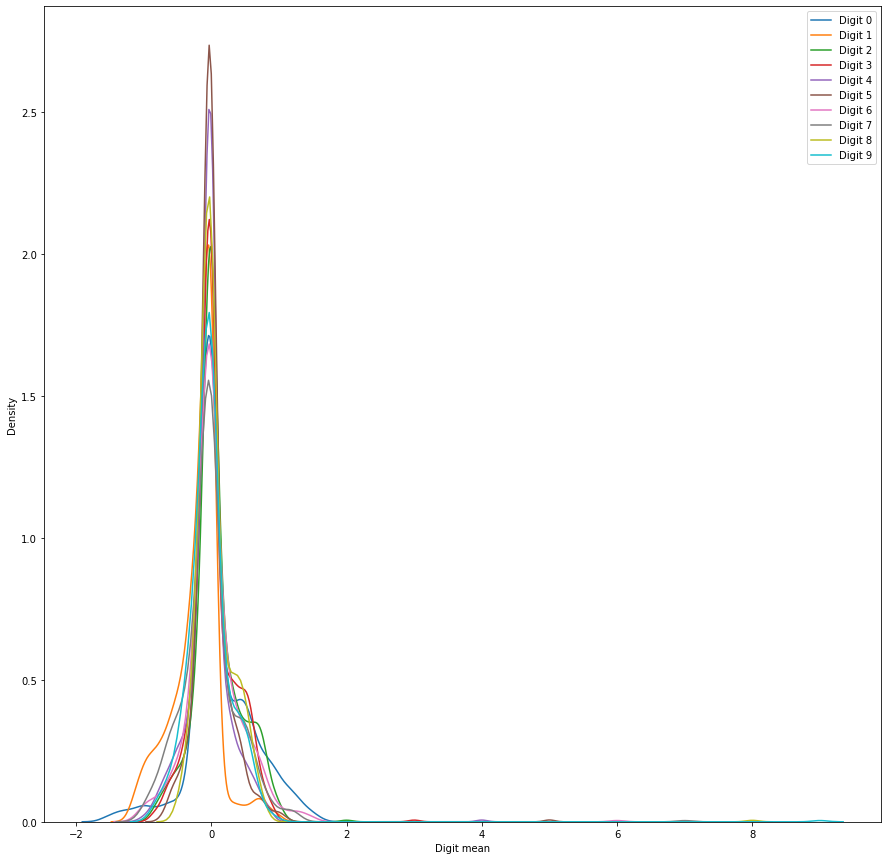

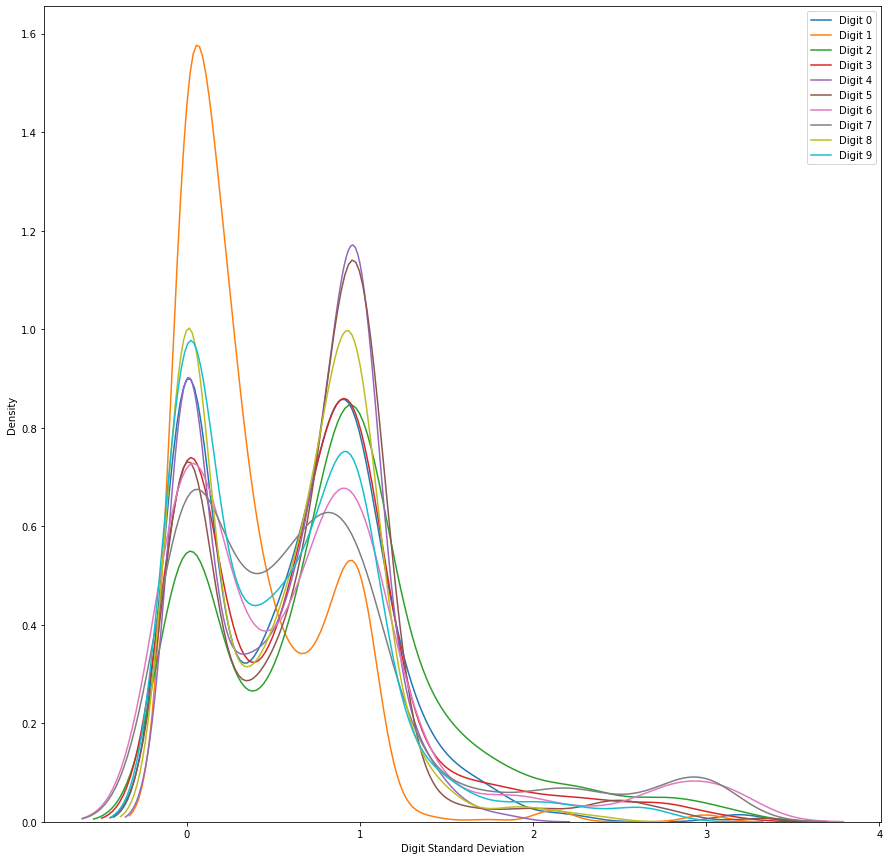

In [ ]:
graph_mean(df)
graph_std(df)

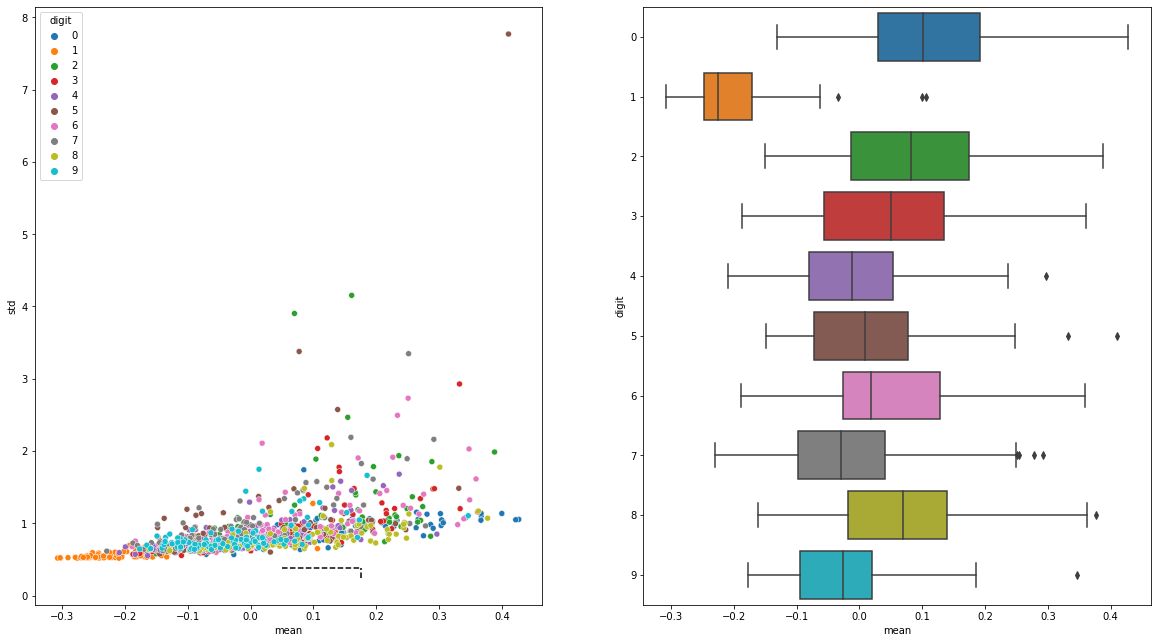

In [ ]:
graph_moment(df, sample_size=100)

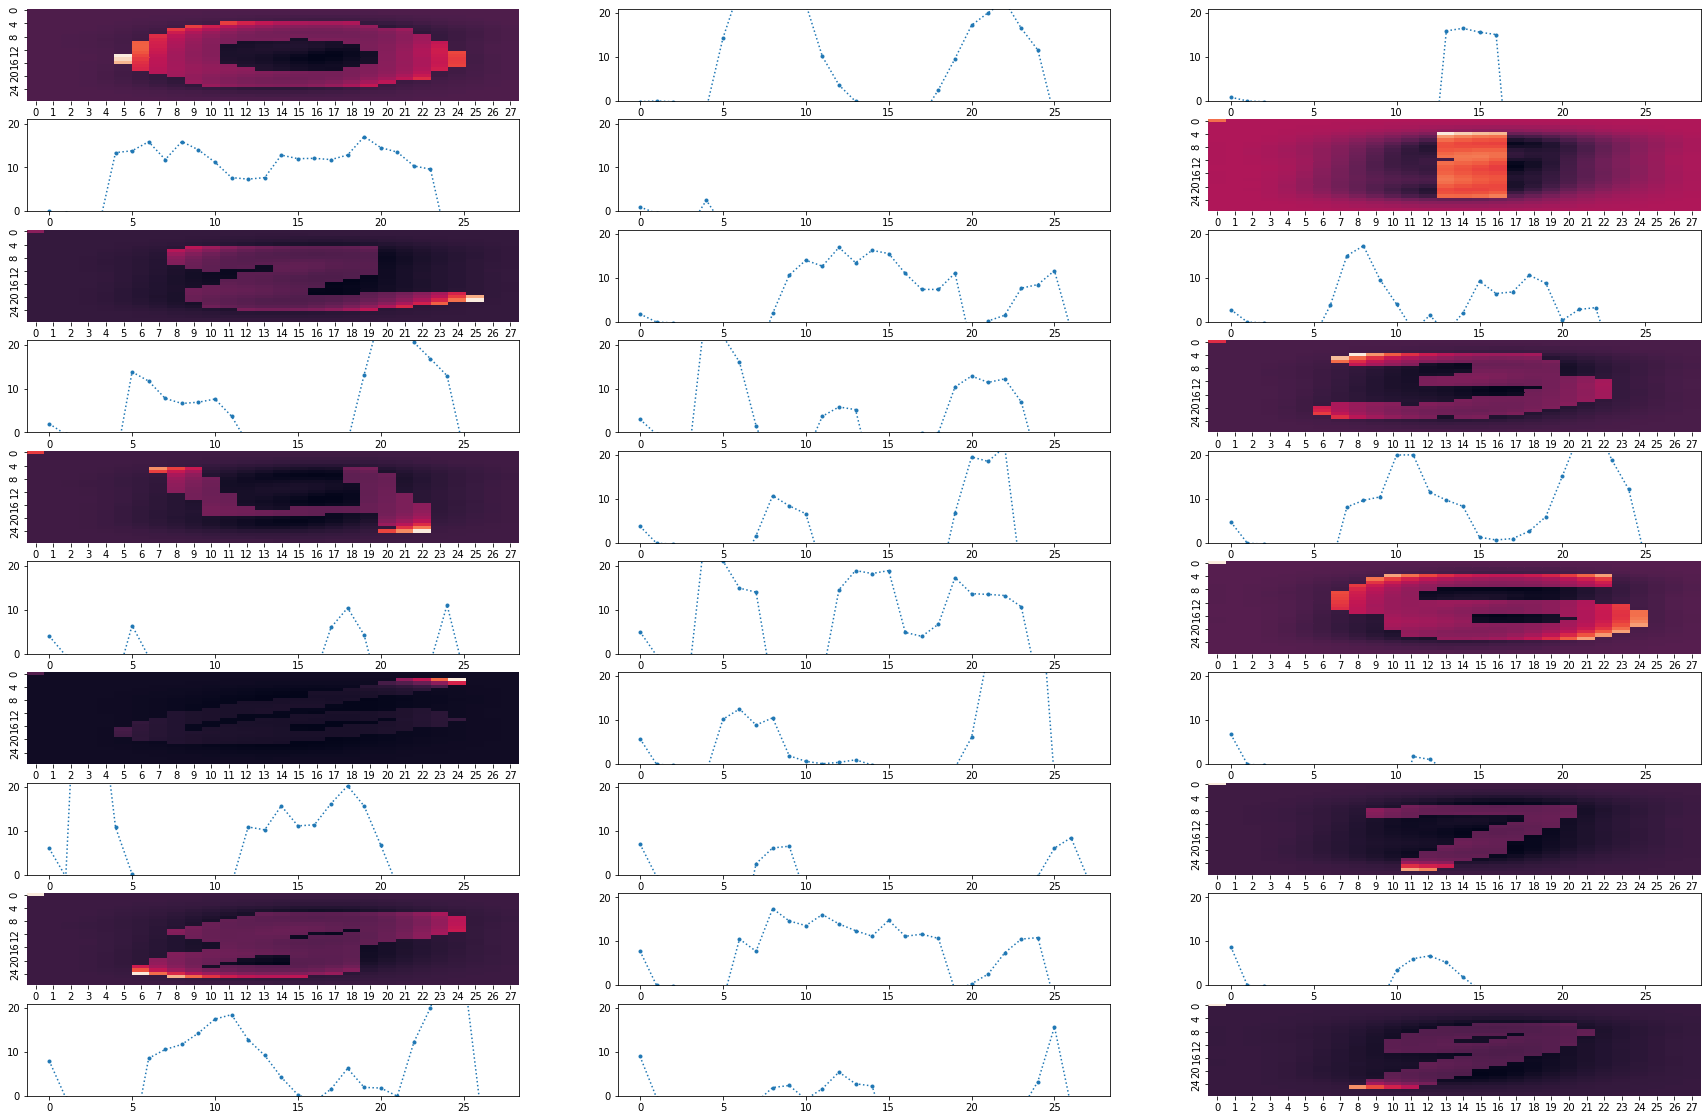

In [ ]:
graph_features(df)

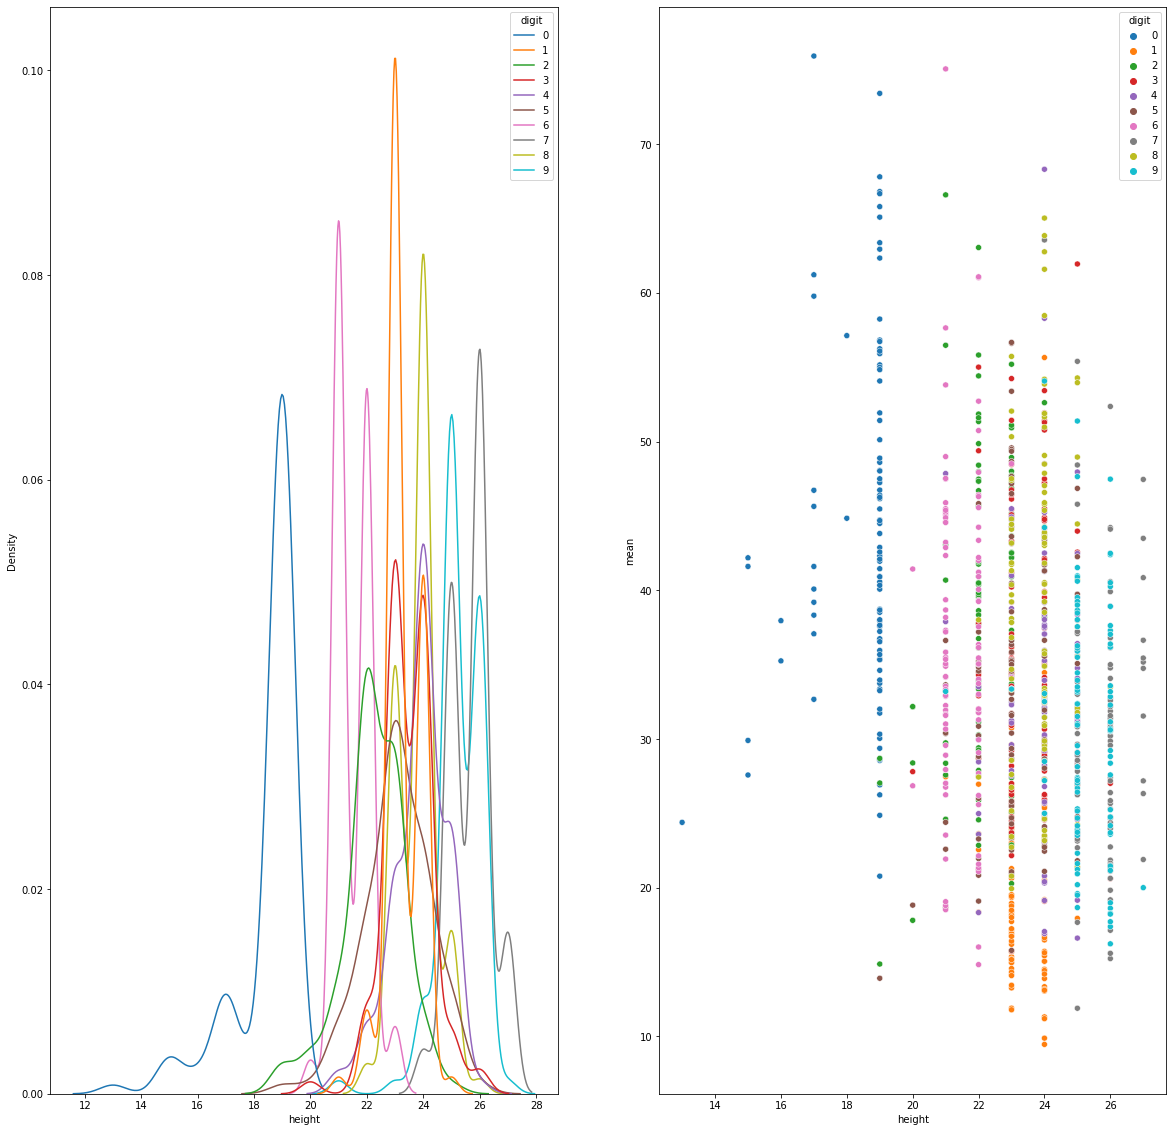

In [ ]:
digit_range = get_digit_range(mnist)
graph_range(digit_range, to_graph="height")

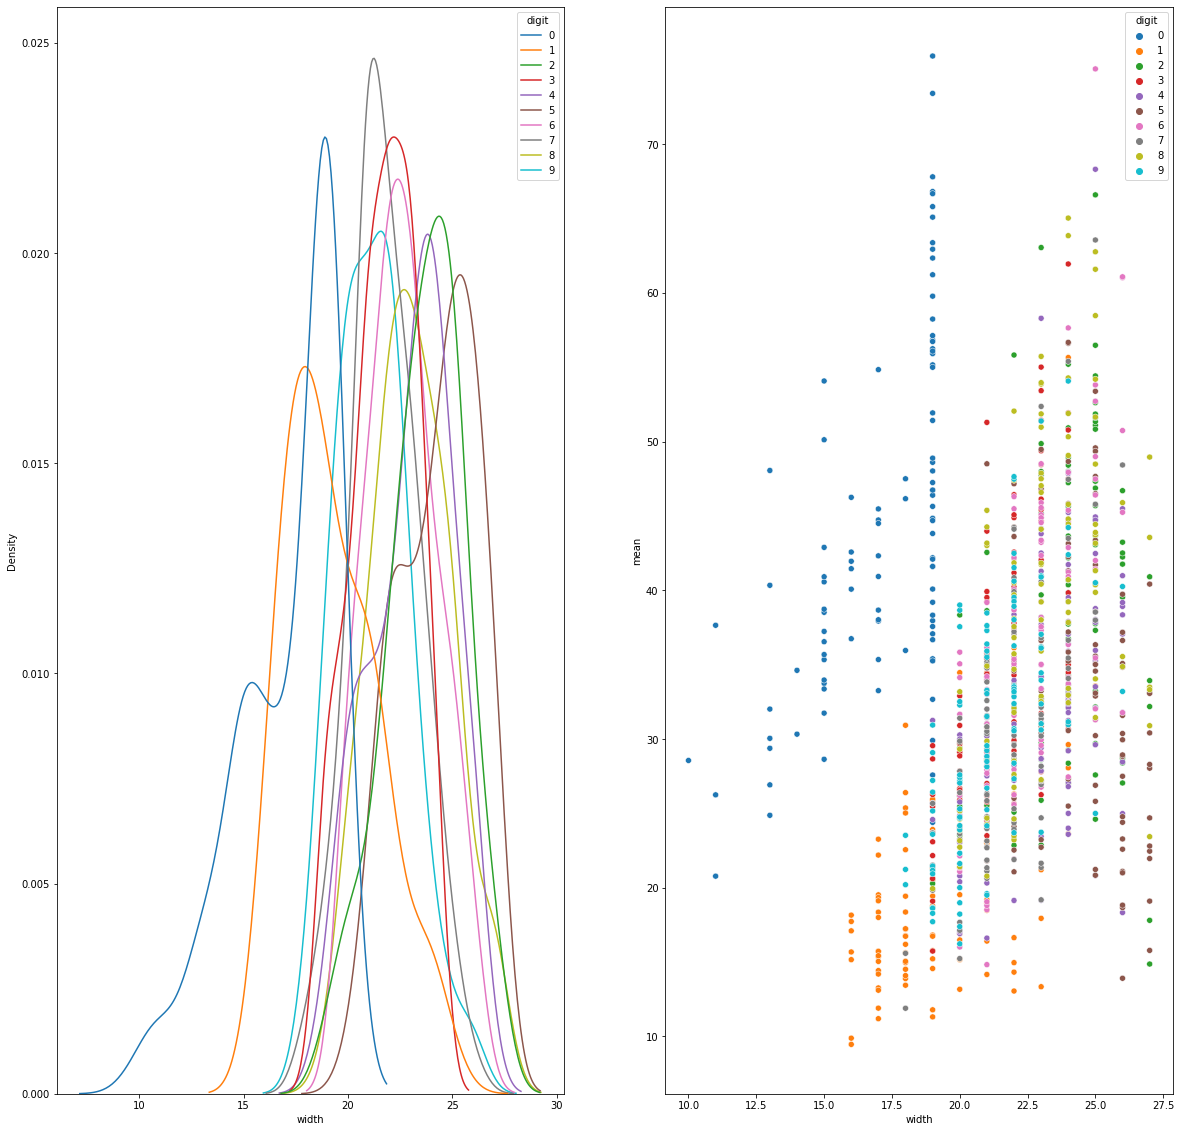

In [ ]:
graph_range(digit_range, to_graph="width")

### The final data frame

In [ ]:
digit_range

width  height       mean         std digit
1        19      19  56.826752   99.169230     0
4        19      19  65.086624  104.821216     0
5        13      19  29.377070   72.942985     0
17       17      19  42.315924   86.855451     0
23       19      19  58.235669   99.027010     0
...     ...     ...        ...         ...   ...
989      21      25  19.504459   58.913226     9
997      21      26  36.388535   83.398298     9
1006     19      25  27.216561   71.925833     9
1028     19      26  17.717197   55.158621     9
1031     25      26  40.508280   86.008440     9

[1000 rows x 5 columns]

As we can clearly see we get a better result of prepocessing the data while we are doing a min max normalization, but we get a more center towards width and height with the normalization utilizing a standard deviation, although we have to consider there are other methods that we can still apply to get a better result when we apply it to our model. Since we have activation functions that will help us to get better results that will be reflected in our output layer

### 3. Preprocess data

In [ ]:
data = np.array(mnist)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([2, 6, 9, ..., 1, 3, 4])

### 4. Helpers (Functions that will help the model)

If we take a look at the code, then we can see that since the input images are on a based format of 28x28 we are taking this into consideration and setting up:
* a[0]: our zeroth layer (meaning the input layer) to have 784 units
* a[1]: the first layer is going to have 10 units (hidden layer)
* a[2]: and the thrid and final layer is going to have 10 units as well as the second layer (this will be our output layer)

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

the $\mathrm{a}^{[1]}$ layer is going to have a ReLU activation, meaning that we are going to work with a $\mathbf{Z}$ ($\mathrm{a}^{[1]}$ layer not being activated) applied weights and a bias and then running the forward propagation and backward propagation

#### forward Propagation
> $\mathrm{Z}^{[1]} = {W}^{[1]}{X} + {b}^{[1]}$

> $\mathrm{A}^{[1]} = {G}_{ReLU}({Z}^{[1]})$

> $\mathrm{Z}^{[2]} = {W}^{[2]}{A}^{[1]} + {b}^{[2]}$

> $\mathrm{A}^{[2]} = {G}_{softmax}({Z}^{[2]})$

### Backward Propagation

> $\mathrm dZ^{[2]} = A^{[2]} - Y$

> $\mathrm dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$

> $\mathrm{dB}^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$

> $\mathrm dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$

> $\mathrm dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$

> $\mathrm dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$



### 5. Model

Within our model we are going to get the forward propagation and backward propagation and with the return values of those functions update our global paramters in each iteration we have set to N steps in order to train it

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

### 6. Training

The model is going to train taking into consideration our split X_train values, and Y_train values, then compare those values and predict to get the training accuracy of our model

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 4 2 ... 0 2 2] [2 6 9 ... 1 3 4]
0.10414634146341463
Iteration:  10
[0 4 2 ... 0 9 9] [2 6 9 ... 1 3 4]
0.1585609756097561
Iteration:  20
[0 4 2 ... 0 9 0] [2 6 9 ... 1 3 4]
0.21153658536585365
Iteration:  30
[0 4 2 ... 0 9 9] [2 6 9 ... 1 3 4]
0.2588048780487805
Iteration:  40
[0 6 2 ... 0 9 9] [2 6 9 ... 1 3 4]
0.290390243902439
Iteration:  50
[0 6 2 ... 0 9 9] [2 6 9 ... 1 3 4]
0.32121951219512196
Iteration:  60
[0 6 2 ... 0 2 9] [2 6 9 ... 1 3 4]
0.37097560975609756
Iteration:  70
[0 6 2 ... 0 2 9] [2 6 9 ... 1 3 4]
0.45246341463414635
Iteration:  80
[0 6 3 ... 8 2 9] [2 6 9 ... 1 3 4]
0.49585365853658536
Iteration:  90
[0 6 3 ... 1 2 9] [2 6 9 ... 1 3 4]
0.5333414634146342
Iteration:  100
[8 6 4 ... 1 2 9] [2 6 9 ... 1 3 4]
0.5681951219512195
Iteration:  110
[8 6 4 ... 1 2 9] [2 6 9 ... 1 3 4]
0.599390243902439
Iteration:  120
[8 6 4 ... 1 2 9] [2 6 9 ... 1 3 4]
0.6259268292682927
Iteration:  130
[8 6 4 ... 1 2 9] [2 6 9 ... 1 3 4]
0.6479756097560976
Iteration:  1

~84% accuracy on training set.


### 7. Testing

With our previous trained model we can now test with real examples from the MNIST Dataset and test in a real situation how good our NN model is

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

We are testing with a couple examples, and the results are astonishing since it can predict incredibly accurate

Prediction:  [2]
Label:  2


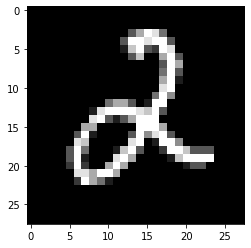

Prediction:  [6]
Label:  6


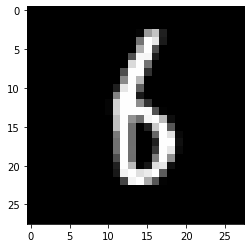

Prediction:  [9]
Label:  9


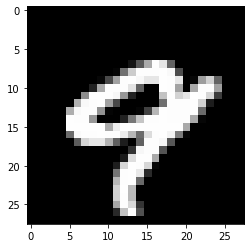

Prediction:  [8]
Label:  5


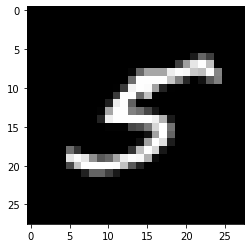

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

#### 7.1 Testing Accuracy

Now if we test with the X_test and Y_test split data we can clearly see we still get a pretty decent accuracy with 83% and as we saw it above the model classifying the digits is doing a decent job

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 9 1 9 3 1 4 3 8 8 1 3 3 3 8 2 1 5 4 5 6 9 3 2 5 1 7 8 7 7 6 7 8 1 4 4 8
 4 8 0 5 4 3 3 3 1 9 5 3 0 6 6 5 4 8 7 3 6 2 1 8 6 4 0 1 1 7 4 3 8 9 1 4 0
 4 7 3 5 9 8 0 8 8 3 2 6 2 1 0 2 9 3 3 2 3 1 2 2 3 4 4 1 5 3 7 3 5 3 9 3 3
 4 8 1 9 8 7 3 6 5 3 1 1 8 7 0 5 8 0 2 6 1 0 8 2 0 4 1 6 4 2 8 8 1 5 7 3 8
 9 2 5 4 9 3 6 1 6 9 3 5 7 5 3 5 9 6 3 2 4 0 7 3 3 5 8 8 2 0 8 1 0 0 7 9 3
 0 6 8 7 2 0 7 2 1 1 7 8 8 7 1 3 0 1 9 6 9 3 5 2 8 4 6 9 9 7 8 1 6 6 1 8 7
 0 4 5 5 5 1 5 2 7 8 8 4 4 6 8 6 4 6 5 8 2 5 9 2 1 7 4 6 0 9 6 1 7 7 1 0 2
 6 0 6 9 3 9 1 5 7 2 2 0 3 7 7 6 9 2 8 8 4 0 6 8 3 6 4 3 1 9 5 8 1 2 5 4 3
 9 6 3 0 0 4 4 9 7 6 0 5 3 2 0 4 8 8 8 5 7 3 1 4 0 1 4 5 6 9 7 9 6 7 0 8 9
 2 9 8 3 3 4 3 3 9 1 0 0 4 6 7 3 6 8 5 3 9 5 1 9 1 4 1 2 0 8 5 7 4 5 2 7 6
 8 3 2 2 0 7 9 4 9 4 4 4 2 8 0 0 3 2 2 7 1 0 7 9 1 2 5 8 8 2 9 1 3 5 7 3 6
 7 1 1 0 7 2 8 2 9 3 4 4 6 6 3 7 7 5 0 3 4 6 1 4 0 3 1 4 8 5 6 5 8 4 6 9 7
 9 1 4 5 3 7 7 1 8 1 1 9 5 7 7 3 8 3 9 6 2 6 8 2 8 2 9 7 1 5 9 0 0 8 4 5 9
 7 8 4 6 5 1 0 0 4 9 2 7 

0.851

### 8. Conclusions

it is amazing how we can create a NN with some simple algebra and how it is so simple to generalized our model from a dataset like MNIST and build something that can predict digits pretty well and not only hand written digits, we can use it towards other datasets and classify pretty much anything doing the proper data preprocessing to give it as an input to our NN